##  Binomial Classification Project - Final Copy

Using binomial classification to predict COVID-19 infection on a large dataset (>618K samples) with extreme imbalance and minority class (.13% of samples) as target.

Baseline rate of .07 **recall in target class improved by 54%**

The final iteration is a manually tuned random forest classifier with >95% accuracy and >64% recall for target class.

* Andi Osika

* Blog post URL: https://andiosika.github.io/imbalanced_data


## Project Quick Links:
**Link** | **Description**
--| --|
[Background](#Background:) | Details around the subject, datasource and objective
[Features and Descriptions](#Features-and-Descriptions:) | Details on each feature collected in the dataset
[Preprocessing](#Preprocessing:) | Steps taken to prepare data for modeling and evaluation
[Main Dataset](#Main-Dataset:) | The dataset in it's final form used for the predictive modeling results described in the [Conclusion](#Conclusion:)  section
[Modeling](#Modeling:) | Various iterations of predictive classification modeling including Decision Trees, Random Forest and XGBoost
[Best Model](#BEST-MODEL:-Manually-Tuned-Random-Forest) |Random Forest Classification Model including [Visualizations]() Confusion Matrix, ROC Curve, Feature Importance by Rank, Correlations
    [Conclusion](#Conclusion:) | Summation of outcomes from modeling
    


<img src='https://raw.githubusercontent.com/andiosika/dsc-mod-3-project-v2-1-online-ds-pt-100719/master/c0481846-wuhan_novel_coronavirus_illustration-spl.jpg' width=40% alignment=l>

## Background:

Coronavirus disease (COVID-19) is an infectious disease.  It was discovered in late 2019 and early 2020 and is believed to have originated from Wuhan, China.  It escalated into a global pandemic.

According to the [World Health Organization](https://www.who.int/health-topics/coronavirus#tab=tab_1), most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. In response, much data has been collected in various ways to further inform ways to slow the spread. 

The dataset used in this evaluation was created by a project created by a UK based platform-solutions company called [Nexoid]( https://www.nexoid.com/). At the start of the pandemic, Nexoid noted that there was a lack of large datasets required to predict the spread and mortality rates related to COVID-19. They took it upon themselves to create and share this dataset as an effort to better understand these factors. It is a not-for-profit project with the goal of providing researchers and governments the data needed to help understand and fight COVID-19. It is a sample provided by self-reporting of over 618,000 individuals and collects biological, behavioral, and environmental factors as well as their COVID-19 status.

The data is collected here: 
https://www.covid19survivalcalculator.com/ .  In exchange for the data, a risk of infection and mortality are returned to the user based on Nexoid's model which is not publicly sharded, yet recorded in this dataset post-hoc.  These values are reflected in the columns risk_infection and risk_mortality.

The questionaire used to collect data has since undergone several versions and several features collected during this sample are no longer being tracked. Data for this observation was collected between March 27 - April 10 of 2020, and only a very small rate (.13%) of respondents reported testing postive for COVID-19. It should be noted that at this time there was a shortage of tests available in the United States and latency in recieving results was up to two weeks. 


**The intention of this classification project is to identify primary contributing factors for contracting COVID-19.**

In [43]:
##Importing dataset
import pandas as pd
df = pd.read_csv("master_dataset4.csv")
pd.set_option('display.max_columns', 0)
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


### Features and Descriptions:

There are 43 features on which data was collected around biometetrics, behavior and enviromnent.  

Details are below:

**Feature** | **Description**
--|--
survey_date|The date the survey was submitted
region	
country |The country collected from IP address long, lat
ip_latitude	|ip latitude of device at time of survey
ip_longitude |ip longitude of device at time of survey	
ip_accuracy	|-n/a
sex	|Self reported sex
age	| Self reported age based on birthdate
height |Height in cm
weight | Weight in kg
bmi	| Body Mass Index as calculated from self-reported height and weight
blood_type	| Blood type
smoking	| reported smoking/vapeing habits (never, do, 1-5x, 6-20x, 20+, quit<5yrs, quit>5yrs, quit>10yrs
alcohol	| reported days of alcohol consuption in last 14 days 
cannabis | reported days of cannabis consumpiton in last 28 days
amphetamines | reported days of amphetamine consumpiton in last 28 days	
cocaine	| reported days of cocaine consumpiton in last 28 days
lsd	| reported days of lsd consumpiton in last 28 days
mdma | reported days of mdma(ecstacy) consumpiton in last 28 days	
contacts_count	| reported contacts in the last week (1-20 and 20+)
house_count	| how many people live in the subjects dwelling
text_working | work/school travel behaviors (0-5 never did, always did, have stopped, critical only, still do)
rate_government_action	| scale of attitude that government is taking covid-19 seriously (disagree, neutral, agree)
rate_reducing_risk_single | scale of self-assesment to reduce risk(social distancing, hand washing) (disagree, neutral, agree)
rate_reducing_risk_house | scale of assessesed co-habitators risk reduction (social distancing, hand washing)(disagree, neutral, agree)	
rate_reducing_mask	| scale of how often a mask is worn outside dwelling 1-5 rarely, sometimes, usually)
covid19_positive | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_symptoms | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_contact	|A binomial value 0=no, 1=yes to the question "Have you been in contact with someone who has tested positive?"
asthma | A binomial value 0=no, 1=yes to the question "Do you have?"
kidney_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
compromised_immune |  A binomial value 0=no, 1=yes to the question "Do you have?"
heart_disease | A binomial value 0=no, 1=yes to the question "Do you have?"	
lung_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
diabetes | A binomial value 0=no, 1=yes to the question "Do you have?"
hiv_positive | A binomial value 0=no, 1=yes to the question "Do you have?"
hypertension | A binomial value 0=no, 1=yes to the question "Do you have?"
other_chronic | A binomial value 0=no, 1=yes to the question "Do you have?"
prescription_medication | Reported prescription medications
opinion_infection | No information is given about this feature, no longer collecting data on this, it is theorized that it had to do with if the subject believed they had the infection.
opinion_mortality | No information is given about this feature, no longer collecting data on this, it is theorized that it had to do with if the subject believed they could die from the infection.
risk_infection | calc'd risk for infection (based on their models)
risk_mortality | calc'd risk for mortality (based on their models)


## Inspecting the dataset:

#### Software Package Installs:

In [44]:
# Package Installs
import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
import functions as fn
import importlib

from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

This set of data contains just over 619K entries and has 43 columns of both numeric and categorical data.  Because of the size of this dataset, pandas profiling was used to inform potential considerations for dataset selection and develop a strategy to manage preprocessing of a set this size.

In [45]:
profile = ProfileReport(df, minimal=True)
profile

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [46]:
df['opinion_infection'].value_counts()

25.0    85441
45.0    76041
55.0    74496
15.0    71453
5.0     68037
35.0    65949
65.0    29698
75.0    23637
85.0     9254
95.0     7028
Name: opinion_infection, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619027 entries, 0 to 619026
Data columns (total 43 columns):
survey_date                  619027 non-null object
region                       42296 non-null object
country                      619010 non-null object
ip_latitude                  619027 non-null float64
ip_longitude                 619027 non-null float64
ip_accuracy                  619026 non-null float64
sex                          619027 non-null object
age                          619027 non-null object
height                       619027 non-null int64
weight                       619027 non-null int64
bmi                          619027 non-null float64
blood_type                   619027 non-null object
smoking                      617174 non-null object
alcohol                      617174 non-null float64
cannabis                     606540 non-null float64
amphetamines                 591599 non-null float64
cocaine                      589898 non-null float64


### Data Background Observation: 
> The data was provided by subjects from 173 countries.  It is noted that 87% of the data comes from the US.  The next top provider of data is Canada ~5% , followed by the United Kingdom ~2.3%:

In [48]:
print(df['country'].value_counts(normalize=True))
countriesdf= pd.DataFrame(df['country'].value_counts())
countriesdf.head(20)

US    0.878483
CA    0.049560
GB    0.023211
AU    0.011354
BR    0.005552
        ...   
SR    0.000002
BW    0.000002
AD    0.000002
WS    0.000002
CM    0.000002
Name: country, Length: 173, dtype: float64


,country
US,543790
CA,30678
GB,14368
AU,7028
BR,3437
MX,1740
DE,1415
PH,1117
RU,831
NZ,705


Text(0.5, 1.0, 'US Represents 87% of Data:')

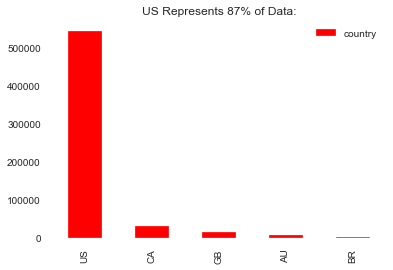

In [49]:
countriesdf.head(5).plot(kind='bar', color='r')
plt.title('US Represents 87% of Data:')

In [50]:
df['covid19_positive'].value_counts()

0    618134
1       893
Name: covid19_positive, dtype: int64

#### Target Class is highly imbalanced: 

> Out of the nearly 618,134 samples, 893 tested positive for COVID-19, or .0014%

This is an approximate ratio of 1:1000

#### Inspecting correlations:

In [51]:
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


In [52]:
df_cor = pd.DataFrame(df.corr()['covid19_positive'].sort_values(ascending=False))
df_cor

,covid19_positive
covid19_positive,1.000000
risk_infection,0.198632
covid19_symptoms,0.089861
opinion_infection,0.054837
covid19_contact,0.050774
risk_mortality,0.014074
mdma,0.012152
heart_disease,0.007975
weight,0.007503
lsd,0.007137


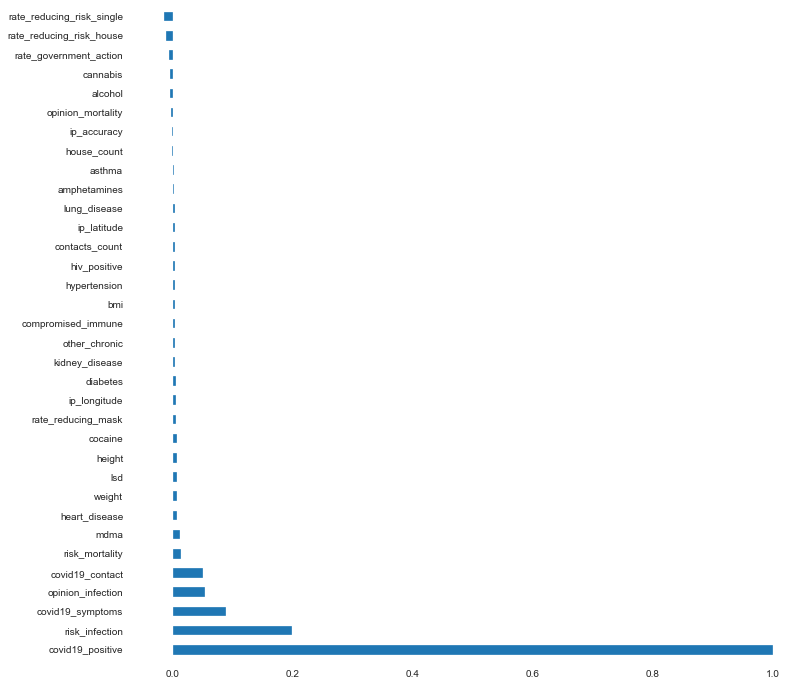

In [53]:
df.corr()['covid19_positive'].sort_values(ascending=False).plot(kind='barh', figsize=(12,12))

In [54]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1) 

,ip_latitude,ip_longitude,ip_accuracy,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,risk_infection,risk_mortality
ip_latitude,1.0,-0.47,-0.035,0.0054,0.025,0.024,-0.0015,0.034,-0.0043,0.0033,-0.0053,-0.015,-0.022,-0.01,0.026,0.0078,0.0062,-0.023,0.0034,0.0096,0.0052,0.0078,-0.00053,0.0046,-0.0045,0.0018,0.0016,-0.01,-0.0054,0.0042,0.031,0.0072,0.025,-0.004
ip_longitude,-0.47,1.0,-0.018,0.027,-0.044,-0.058,-0.0067,-0.052,-0.008,-0.00027,-0.0037,0.016,-0.029,-0.016,0.071,0.011,0.0086,-0.029,0.0061,0.0088,-0.0084,-0.001,-0.0014,-0.013,-5.9e-06,-0.0033,-0.018,0.00038,-0.027,0.00099,-0.024,-0.0062,-0.04,-0.012
ip_accuracy,-0.035,-0.018,1.0,0.0081,0.016,0.014,-0.025,0.008,0.014,0.0067,0.0031,0.0022,0.098,0.036,0.011,-0.034,-0.027,-0.021,-0.0013,-0.003,0.007,-0.0089,0.0025,-0.003,0.00049,0.0031,-0.00014,-0.0014,0.0021,-0.0082,0.00022,-0.00086,0.1,-0.015
height,0.0054,0.027,0.0081,1.0,0.39,-0.096,0.11,0.047,0.013,0.043,0.052,0.047,0.013,-0.06,0.013,-0.012,0.029,-0.046,0.007,-0.0065,-0.0055,-0.067,0.0015,-0.057,0.025,-0.0065,0.028,0.036,0.056,-0.053,-0.031,-0.096,0.036,0.085
weight,0.025,-0.044,0.016,0.39,1.0,0.87,-0.066,-0.012,-0.0019,-0.0032,-0.0009,-0.0059,0.055,0.00021,-0.019,-0.014,-0.0029,-0.029,0.0075,0.0036,-0.0046,0.047,0.012,0.0096,0.041,0.012,0.17,0.0094,0.22,0.02,0.018,0.1,0.065,0.065
bmi,0.024,-0.058,0.014,-0.096,0.87,1.0,-0.13,-0.033,-0.0071,-0.023,-0.024,-0.026,0.053,0.029,-0.027,-0.0085,-0.018,-0.0073,0.0043,0.0072,-0.0027,0.085,0.012,0.04,0.031,0.016,0.17,-0.0066,0.21,0.049,0.033,0.16,0.052,0.027
alcohol,-0.0015,-0.0067,-0.025,0.11,-0.066,-0.13,1.0,0.076,0.037,0.11,0.096,0.11,-0.011,-0.059,-0.011,-0.015,0.0059,-0.038,-0.0041,-0.0044,0.0058,-0.028,-0.012,-0.05,-0.013,-0.014,-0.071,0.011,-0.0078,-0.053,0.025,-0.076,-0.022,0.024
cannabis,0.034,-0.052,0.008,0.047,-0.012,-0.033,0.076,1.0,0.083,0.17,0.21,0.2,0.012,-0.0073,-0.09,-0.015,-0.021,-0.0054,-0.0044,0.013,-0.021,0.033,0.002,0.026,-0.0052,0.014,-0.022,0.025,-0.031,0.03,0.038,0.05,-0.0053,-0.043
amphetamines,-0.0043,-0.008,0.014,0.013,-0.0019,-0.0071,0.037,0.083,1.0,0.18,0.2,0.21,0.028,0.011,-0.013,-0.041,-0.035,-0.0091,0.0024,0.013,0.011,0.011,0.0095,0.017,0.0085,0.016,0.0025,0.031,0.011,0.015,0.016,0.021,0.035,0.015
cocaine,0.0033,-0.00027,0.0067,0.043,-0.0032,-0.023,0.11,0.17,0.18,1.0,0.44,0.47,0.027,0.004,-0.028,-0.063,-0.049,-0.027,0.0068,0.014,0.0054,0.011,0.018,0.013,0.014,0.019,0.0011,0.059,-0.0064,0.0014,0.012,0.0096,0.041,0.033


### Raw Data Inspection Observations: 

> Most of the data collected ~ 87% comes from the United states with Canada 5% and UK 2.5% next.  The rest of the countries reporting are even smaller in terms of contribution size.  A very small percentage: **.0014% tested positive for COVID-19** in this sample.  There are no direct correlations and the most highly correlated features of the unprocessed data are: 

Feature: |  Correlation: 
 --| --|
covid19_positive |	1.000000
risk_infection | 0.198632
covid19_symptoms | 0.089861
opinion_infection |	0.054837
covid19_contact | 0.050774
risk_mortality | 0.014074
mdma | 0.012152
heart_disease | 0.007975
weight | 0.007503
lsd |	0.007137
height | 0.006999


## Preprocessing:

This section outlines steps taken to prepare the data for analysis. The first step was to address missing/null values.  


Initial visual inspection of null values indicates that region and prescription medication are sparsely populated.  Since region was ~90% missing, it was dropped.  Prescription medication had 57K values and details are [included in this section](#Prescription-Medication). 

The opinion_infections and opinion_mortality columns are also a little 'light' in terms of responses and have the same number of responses.  This null rate of ~16% was imputed with the median values for each respective field. 

Null values in columns that contain <5% null values were dropped.  

Other than those outlined above, there doesn't seem to be be any other apparent patterns for incomplete data. (See below).


### Null or Missing Data: 

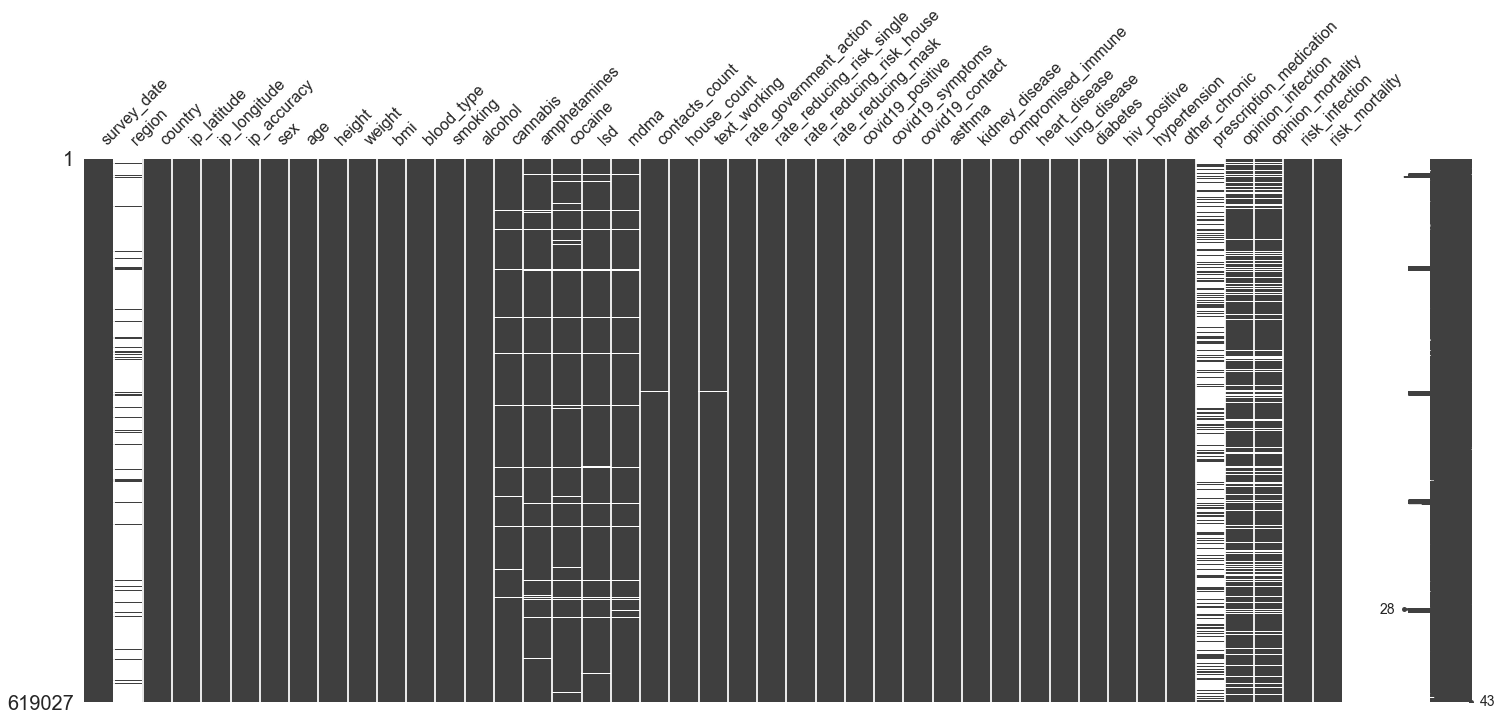

In [55]:
import missingno
missingno.matrix(df)

Aditional inspection shows that there are quite a few columns with less than 5% null values.  Since this dataset is so large, it seems reasonable to remove these.  Details follow:

In [56]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls


,variable,%_Null
1,region,93.167342
38,prescription_medication,68.800876
40,opinion_mortality,17.445604
39,opinion_infection,17.445604
16,cocaine,4.705611
15,amphetamines,4.430825
17,lsd,4.089644
18,mdma,3.513255
14,cannabis,2.017198
21,text_working,0.683654


In [57]:
cols_to_drop_na = ['country','ip_accuracy','smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 
                   'contacts_count', 'text_working', 'rate_reducing_mask', 'risk_infection',
                  'risk_mortality']

In [58]:
df.dropna(subset=cols_to_drop_na, inplace=True)

In [59]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
1,region,93.322091
38,prescription_medication,68.619982
40,opinion_mortality,16.900436
39,opinion_infection,16.900436
30,kidney_disease,0.000000
23,rate_reducing_risk_single,0.000000
24,rate_reducing_risk_house,0.000000
25,rate_reducing_mask,0.000000
26,covid19_positive,0.000000
27,covid19_symptoms,0.000000


#### Imputing 'opinions'

In [60]:
df.loc[df['opinion_mortality'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [61]:
df.loc[df['opinion_infection'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [62]:
df['covid19_positive'].value_counts(normalize=True)

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64

> **NOTE**:Since these two columns scale to reflect opinion tend to not have a higher incidence in those that tested positive for covid, initially a feature to indicate null values will be created and a mean value of 15 will be imputed for opinion mortality and 35 for opinion infection.  Should the model indicate relevance, or demonstrate necessity for improvment, this feature can be adjusted.

In [63]:
df['opinion_mortality'].value_counts(normalize=True)

5.0     0.460670
15.0    0.178922
25.0    0.106206
45.0    0.065505
55.0    0.059436
35.0    0.057783
65.0    0.023647
75.0    0.023350
85.0    0.014222
95.0    0.010262
Name: opinion_mortality, dtype: float64

In [64]:
#use median /mean to fill
df['opinion_mortality'].median()

15.0

In [65]:
df['omwasnull'] = df['opinion_mortality'].isna()

In [66]:
df['opinion_mortality'].fillna(15.0, inplace=True)

In [67]:
df['omwasnull'].head(3)

0    False
1    False
2     True
Name: omwasnull, dtype: bool

In [68]:
df['oiwasnull'] = df['opinion_infection'].isna()

In [69]:
df['opinion_infection'].median()

35.0

In [70]:
df['opinion_infection'].fillna(35, inplace=True)

#### Date: Dropping feature

While the date the data was collected could have a bearing on whether or not someone tested postivie, it would not provide insight to biological, behavioral or geographical indicators

In [71]:
df['survey_date'].unique()

array(['4/4/2020', '4/5/2020', '4/3/2020', '4/6/2020', '3/27/2020',
       '3/28/2020', '3/26/2020', '3/29/2020', '3/30/2020', '3/31/2020',
       '4/1/2020', '4/2/2020', '4/7/2020', '4/8/2020', '4/9/2020',
       '4/10/2020'], dtype=object)

In [72]:
df.drop('survey_date', axis=1, inplace=True)

#### Dropping Region as a feature due to lack of complete data, as well as  lat/long and will use country for geographic information

In [73]:
df['region'].value_counts()

EU    22523
OC     6965
SA     4103
AS     4073
AF      748
Name: region, dtype: int64

In [74]:
df['region'].isnull().sum()/len(df)

0.9332209106239461

In [75]:
cols_to_drop = ['region','ip_latitude', 'ip_longitude']


In [76]:
df.drop(cols_to_drop, axis=1, inplace=True)

> A quick look to make sure the nulls are gone:

In [77]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
34,prescription_medication,68.619982
0,country,0.000000
30,diabetes,0.000000
23,covid19_symptoms,0.000000
24,covid19_contact,0.000000
25,asthma,0.000000
26,kidney_disease,0.000000
27,compromised_immune,0.000000
28,heart_disease,0.000000
29,lung_disease,0.000000


### Prescription Medication 

* Contains 57,106 distinct values *from profile report

There are a total of 1297 distinct prescription medications in various combinations.  Future work could be done to see if there is a correlation or importance in quantity of medications taken, individual medications or combinations of medications.  

In [78]:
df['prescription_medication'].value_counts()

LEVOTHYROXINE SODIUM                                                                                                  9480
SERTRALINE HYDROCHLORIDE                                                                                              5979
ESCITALOPRAM OXALATE                                                                                                  3848
LISINOPRIL                                                                                                            3777
AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXTROAMPHETAMINE SACCHARATE;DEXTROAMPHETAMINE SULFATE                      2907
                                                                                                                      ... 
BUPROPION HYDROCHLORIDE;DULOXETINE HYDROCHLORIDE;LEVOTHYROXINE SODIUM;LOSARTAN POTASSIUM;PROPRANOLOL HYDROCHLORIDE       1
LOPERAMIDE HYDROCHLORIDE;MESALAMINE;VEDOLIZUMAB                                                                          1
GABAPENTIN;PAROX

In [79]:
##creating a column to track lack of prescription medication:
df['taking_prescription_medication'] = df['prescription_medication'].notnull()


In [80]:
#filling in null values with a value of "NONE" to indicate they are taking no meds
df['prescription_medication'].fillna('NO', inplace=True)

In [81]:
split_data = df["prescription_medication"].str.split(";")
meds = split_data.to_list()

meds_df = pd.DataFrame(meds)
meds_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [82]:
meds = meds_df.drop_duplicates()

In [83]:
meds1 = pd.DataFrame(df['prescription_medication'].unique())
meds1.columns = ['Prescriptions']
meds2 = meds1['Prescriptions'].str.split(';', expand=True)

Code for counting how many scrips people are on:

In [84]:
meds5 = meds1['Prescriptions'].apply(lambda x: len(x.split(';')))
meds5

0         1
1         4
2         1
3         4
4         4
         ..
53996     6
53997     4
53998    12
53999     8
54000     5
Name: Prescriptions, Length: 54001, dtype: int64

In [85]:
meds2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,HYDROCHLOROTHIAZIDE,LOSARTAN POTASSIUM,METHYLPHENIDATE,OMEPRAZOLE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,CLONAZEPAM,ETHINYL ESTRADIOL,NORGESTIMATE,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53996,ALPRAZOLAM,AMITRIPTYLINE HYDROCHLORIDE,DULAGLUTIDE,GLIMEPIRIDE,LISINOPRIL,PRAVASTATIN SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53997,BUPROPION HYDROCHLORIDE,FEXOFENADINE HYDROCHLORIDE,GABAPENTIN,MELOXICAM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53998,CONJUGATED ESTROGENS/MEDROXYPROGESTERONE ACETATE,CYCLOBENZAPRINE HYDROCHLORIDE,EMPAGLIFLOZIN,ESCITALOPRAM OXALATE,IBUPROFEN,LEVOTHYROXINE SODIUM,LISINOPRIL,LORATADINE,METFORMIN HYDROCHLORIDE,SITAGLIPTIN PHOSPHATE,OMEPRAZOLE,ZOLPIDEM TARTRATE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53999,AMPHETAMINE ASPARTATE,AMPHETAMINE SULFATE,DEXTROAMPHETAMINE SACCHARATE,DEXTROAMPHETAMINE SULFATE,ETHINYL ESTRADIOL,NORETHINDRONE,FEXOFENADINE HYDROCHLORIDE,MONTELUKAST SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [86]:
scrips = []
for col in meds2.columns:
    x = list(set(meds2[col]))
    scrips.extend(x)
    

In [87]:
len(scrips)

7304

In [88]:
cleanscrips = set(scrips)
len(cleanscrips)

1297

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575210 entries, 0 to 619026
Data columns (total 42 columns):
country                           575210 non-null object
ip_accuracy                       575210 non-null float64
sex                               575210 non-null object
age                               575210 non-null object
height                            575210 non-null int64
weight                            575210 non-null int64
bmi                               575210 non-null float64
blood_type                        575210 non-null object
smoking                           575210 non-null object
alcohol                           575210 non-null float64
cannabis                          575210 non-null float64
amphetamines                      575210 non-null float64
cocaine                           575210 non-null float64
lsd                               575210 non-null float64
mdma                              575210 non-null float64
contacts_count              

### Biological Features: 
* Height, weight, BMI and sex

In [90]:
fn.des(df['sex'])

'------------- Value Counts: -----------'

female    402914
male      170211
other       2085
Name: sex, dtype: int64

'-------------- Description: ---------'

count     575210
unique         3
top       female
freq      402914
Name: sex, dtype: object

#### Observations on height: potential outliers to remove: <140cm and >200cm

In [91]:
fn.des(df['height'])

'------------- Value Counts: -----------'

164    56519
166    47982
168    47254
172    43838
162    40631
       ...  
222        6
220        6
224        5
218        5
236        2
Name: height, Length: 65, dtype: int64

'-------------- Description: ---------'

count    575210.000000
mean        169.063834
std          11.101964
min         110.000000
25%         162.000000
50%         168.000000
75%         176.000000
max         238.000000
Name: height, dtype: float64

#### Observations on weight:  outliers over ~150kilos

(82     24188
 70     21755
 74     21647
 80     20775
 78     20614
        ...  
 170      386
 174      296
 176      278
 172      277
 178      183
 Name: weight, Length: 69, dtype: int64, count    575210.000000
 mean         86.105141
 std          24.486852
 min          44.000000
 25%          68.000000
 50%          82.000000
 75%         100.000000
 max         180.000000
 Name: weight, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x2427999fd68>)

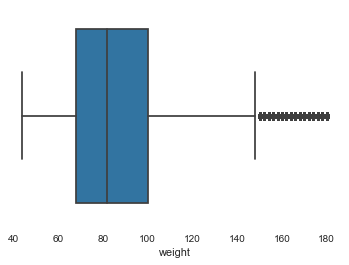

In [92]:
fn.bxplt(df['weight'])

#### Age needs was encoded

Age values were encoded based on the median of each age group.


In [93]:
df['age'].value_counts()

30_40      186191
20_30      148259
40_50      116578
50_60       59158
60_70       31074
10_20       18643
70_80        8896
0_10         4407
80_90        1634
90_100        353
100_110        17
Name: age, dtype: int64

In [94]:
age_map = {'0_10' : 5,
          '10_20': 15,
          '20_30' : 25,
          '30_40': 35,
          '40_50': 45,
          '50_60': 55,
          '60_70': 65,
          '70_80': 75,
          '80_90': 85,
          '90_100': 95,
          '100_110': 105}

df['age'] = df['age'].map(age_map)
df['age'].describe()

count    575210.000000
mean         38.048295
std          13.437588
min           5.000000
25%          25.000000
50%          35.000000
75%          45.000000
max         105.000000
Name: age, dtype: float64

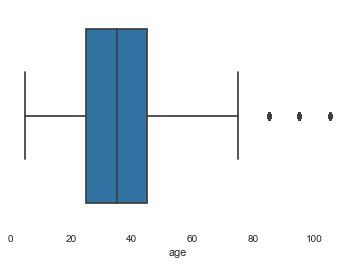

In [95]:
import seaborn as sns
sns.boxplot(df['age']);
plt.show()

#### BMI 

(29.0     12353
 29.7     11679
 30.4     11313
 27.7      9320
 28.3      9226
          ...  
 82.8         1
 71.7         1
 104.1        1
 78.4         1
 109.2        1
 Name: bmi, Length: 699, dtype: int64, count    575210.000000
 mean         30.037971
 std           8.044168
 min          10.000000
 25%          24.200000
 50%          28.300000
 75%          34.300000
 max         143.800000
 Name: bmi, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x24299d537f0>)

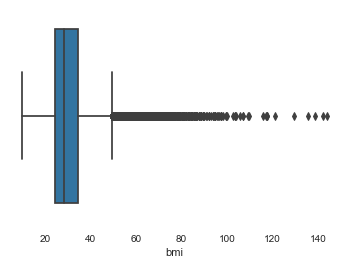

In [96]:
fn.bxplt(df['bmi'])

####  Blood Type, smoking need to be encoded

In [97]:
df['blood_type'].value_counts()

unknown    194513
op         123124
ap         107469
on          50693
bp          35975
an          28422
abp         19503
bn           9277
abn          6234
Name: blood_type, dtype: int64

In [98]:
df['smoking'].value_counts()

never        326888
quit10        55446
yesmedium     50580
vape          37695
quit5         34618
quit0         33149
yeslight      26606
yesheavy      10228
Name: smoking, dtype: int64

### Alcohol & Drugs: Numeric, some/moderate outliers

( 0.0     132092
 -1.0     112941
  1.0      77305
  2.0      55558
  3.0      34201
  4.0      28532
  14.0     26607
  5.0      23456
  7.0      19483
  10.0     17803
  6.0      12762
  12.0      8824
  8.0       7871
  9.0       6465
  13.0      6376
  11.0      4934
 Name: alcohol, dtype: int64, count    575210.000000
 mean          2.672372
 std           4.177297
 min          -1.000000
 25%           0.000000
 50%           1.000000
 75%           4.000000
 max          14.000000
 Name: alcohol, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x2422551ca58>)

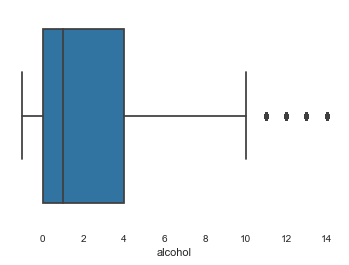

In [99]:
fn.bxplt(df['alcohol'])

(-1.0     300620
  0.0     168057
  28.0     39882
  1.0      16076
  2.0       7928
  3.0       5302
  4.0       4319
  20.0      3736
  5.0       3660
  10.0      3340
  7.0       2785
  14.0      2453
  27.0      2244
  6.0       1732
  25.0      1705
  15.0      1542
  8.0       1346
  24.0      1232
  26.0      1174
  12.0       787
  22.0       700
  23.0       694
  21.0       671
  18.0       635
  9.0        541
  11.0       454
  16.0       407
  17.0       365
  19.0       304
  13.0       267
 -2.0        252
 Name: cannabis, dtype: int64, count    575210.000000
 mean          2.375988
 std           8.075127
 min          -2.000000
 25%          -1.000000
 50%          -1.000000
 75%           0.000000
 max          28.000000
 Name: cannabis, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x2427aee6518>)

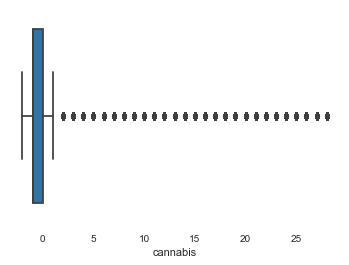

In [100]:
fn.bxplt(df['cannabis'])

In [101]:
df['amphetamines'].value_counts()

-1.0     507348
 0.0      59216
 1.0       1832
 28.0      1640
 2.0       1023
 3.0        629
 4.0        496
 5.0        439
 10.0       300
 7.0        294
-2.0        231
 20.0       215
 6.0        211
 14.0       196
 15.0       147
 27.0       136
 8.0        125
 25.0        92
 24.0        91
 9.0         77
 12.0        65
 26.0        64
 22.0        61
 23.0        59
 11.0        43
 21.0        38
 18.0        38
 19.0        34
 16.0        29
 17.0        23
 13.0        18
Name: amphetamines, dtype: int64

In [102]:
df['cocaine'].value_counts()

-1.0     491189
 0.0      76735
 1.0       2961
 2.0       1217
 3.0        684
 4.0        530
 5.0        340
 7.0        208
 6.0        188
 10.0       167
 28.0       157
 8.0        138
-2.0        134
 14.0        93
 20.0        75
 12.0        56
 9.0         47
 15.0        46
 27.0        36
 25.0        32
 17.0        21
 16.0        21
 11.0        19
 19.0        18
 24.0        18
 18.0        17
 23.0        15
 21.0        13
 22.0        13
 26.0        12
 13.0        10
Name: cocaine, dtype: int64

In [103]:
df['lsd'].value_counts()

-1.0     502197
 0.0      69504
 1.0       2175
 2.0        520
 3.0        182
-2.0        150
 4.0        112
 5.0         70
 28.0        56
 7.0         43
 6.0         36
 8.0         29
 10.0        26
 27.0        21
 9.0         15
 14.0         9
 12.0         9
 24.0         9
 20.0         8
 11.0         7
 18.0         6
 13.0         4
 26.0         4
 17.0         4
 15.0         3
 23.0         3
 19.0         2
 22.0         2
 25.0         2
 21.0         1
 16.0         1
Name: lsd, dtype: int64

In [104]:
df['mdma'].value_counts()


-1.0     500992
 0.0      71143
 1.0       1809
 2.0        416
 3.0        184
-2.0        163
 4.0        108
 5.0         91
 28.0        44
 7.0         39
 6.0         37
 10.0        33
 8.0         31
 9.0         22
 20.0        13
 27.0        12
 14.0        12
 11.0        10
 15.0         8
 26.0         6
 18.0         5
 17.0         5
 22.0         4
 13.0         4
 24.0         4
 12.0         4
 25.0         3
 21.0         3
 16.0         3
 23.0         1
 19.0         1
Name: mdma, dtype: int64

(21.0    80797
 3.0     71691
 4.0     61710
 1.0     61280
 2.0     59036
 5.0     54654
 10.0    42543
 6.0     34862
 0.0     20221
 8.0     19196
 7.0     19079
 15.0    14034
 20.0    10077
 12.0     8580
 9.0      6954
 11.0     2932
 14.0     2466
 13.0     1961
 16.0     1258
 18.0      876
 17.0      728
 19.0      275
 Name: contacts_count, dtype: int64, count    575210.000000
 mean          7.399658
 std           6.746050
 min           0.000000
 25%           3.000000
 50%           5.000000
 75%          10.000000
 max          21.000000
 Name: contacts_count, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x24226183e10>)

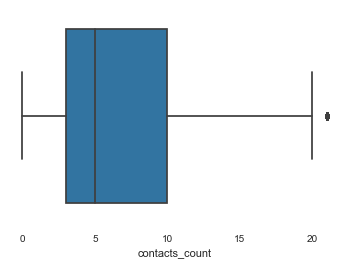

In [105]:
fn.bxplt(df['contacts_count'])

### Behaviors: House Count, Contacts Count, Text Working, Rate Reducing Single, Rate Reducing Mask

(2     183291
 3     124509
 4     115330
 5      60154
 1      50443
 6      24028
 7       9125
 8       4157
 9       1583
 10      1336
 11      1254
 Name: house_count, dtype: int64, count    575210.000000
 mean          3.190734
 std           1.553937
 min           1.000000
 25%           2.000000
 50%           3.000000
 75%           4.000000
 max          11.000000
 Name: house_count, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x242514b8400>)

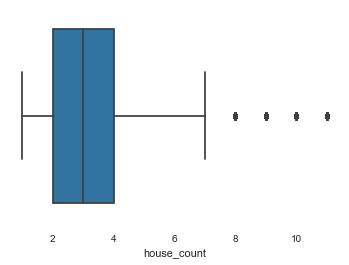

In [106]:
fn.bxplt(df['house_count'])

(1.0    178934
 2.0    159530
 3.0    114260
 4.0     92806
 5.0     29680
 Name: rate_reducing_mask, dtype: int64, count    575210.000000
 mean          2.365046
 std           1.219106
 min           1.000000
 25%           1.000000
 50%           2.000000
 75%           3.000000
 max           5.000000
 Name: rate_reducing_mask, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x242395c3c18>)

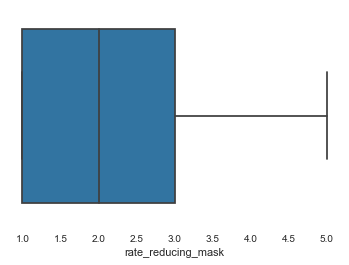

In [107]:
fn.bxplt(df['rate_reducing_mask'])

In [108]:
df.head()

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True


### Further scrubbing and preprocessing;
>* Changing the datatypes of objects to categories and encoding 
* Dropping additional columns
* Creating additional copies of the DataFrame to work from for future work.


   

### Pairing the size of the dataset by changing objects to categories:

In [109]:
df.columns

Index(['country', 'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi',
       'blood_type', 'smoking', 'alcohol', 'cannabis', 'amphetamines',
       'cocaine', 'lsd', 'mdma', 'contacts_count', 'house_count',
       'text_working', 'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic',
       'prescription_medication', 'opinion_infection', 'opinion_mortality',
       'risk_infection', 'risk_mortality', 'omwasnull', 'oiwasnull',
       'taking_prescription_medication'],
      dtype='object')

In [110]:
df.astype({'country' : 'category', 'sex' : 'category', 'blood_type' : 'category',
           'smoking': 'category', 'text_working' : 'category', 'prescription_medication' : 'category'})

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619022,CA,5.0,female,25,168,94,33.3,unknown,never,2.0,4.0,-1.0,-1.0,-1.0,-1.0,3.0,3,stopped,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,57.835,0.017,False,False,False
619023,US,5.0,female,35,174,124,40.9,op,never,1.0,14.0,-1.0,-1.0,-1.0,-1.0,10.0,5,home,0,1,1,3.0,0,0,0,0,0,0,0,0,0,0,1,0,NO,55.0,25.0,59.874,0.078,False,False,False
619024,US,5.0,female,45,166,74,26.8,unknown,never,1.0,-1.0,28.0,-1.0,-1.0,-1.0,21.0,4,travel critical,-1,1,2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXT...,85.0,5.0,67.718,0.294,False,False,True
619025,US,20.0,female,45,166,90,32.6,an,quit10,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0,2,travel critical,1,1,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,ALPRAZOLAM;HYDROXYZINE HYDROCHLORIDE;MONTELUKA...,25.0,15.0,72.490,0.582,False,False,True


## Main Dataset:

**Columns dropped:**
 These columns were dropped in prior processing:
>* **Date** While the date the data was collected could have a bearing on whether or not someone tested postivie, it would not provide insight to biological, behavioral or geographical indicators.
* **Region** This was a feature that substantially lacked data in the inital collection with 93% of the values missing.

In addition the following columns were dropped with rationale below:
>* **ip_accuracy** - This feature measures the accuracy of the IP location and is used in the data collection process rather than for predicting a medical condition.
* **risk_infection** - This is a value calculated post-hoc, based on the data collected from this dataset
* **risk_mortality** - This is a value calculated post-hoc, based on the data collected from this dataset
* **prescription_medication** - This column contains text-strings and has over 57K values. A column was added called **taking_prescription_medication** to capture if an individual is taking prescribed medicine.  It's proposed to deal with this column separately if it's indicated to be a factor separately since this is computationally expensive.


In [111]:
df.drop('ip_accuracy', axis=1, inplace=True)


In [112]:
df.drop('risk_infection', axis=1, 
        inplace=True)

In [113]:
df.drop('risk_mortality', axis=1, inplace=True)

In [114]:
df1 = df.drop('prescription_medication', axis=1)

The primary dataset used for testing:

### Encoding dataset

In [115]:
df2 = pd.get_dummies(df1)
df2.head()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,omwasnull,oiwasnull,taking_prescription_medication,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
0,45,158,114,45.6,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,55.0,35.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,25,168,62,21.9,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,5,136,44,23.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,15.0,True,True,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,35,164,112,41.6,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,45.0,25.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,55,184,132,38.9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,15.0,5.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [116]:
df2.corr()['covid19_positive']

age                                 0.005861
height                              0.005589
weight                              0.006757
bmi                                 0.004146
alcohol                            -0.004861
                                      ...   
text_working_home                   0.000755
text_working_never                 -0.001408
text_working_stopped               -0.002686
text_working_travel critical        0.006793
text_working_travel non critical   -0.004720
Name: covid19_positive, Length: 231, dtype: float64

In [117]:
df2.describe()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,country_AR,country_AT,country_AU,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
count,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.00000,575210.000000,575210.000000,...,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000
mean,38.048295,169.063834,86.105141,30.037971,2.672372,2.375988,-0.726154,-0.801010,-0.857699,-0.856922,7.399658,3.190734,0.321573,1.013882,0.869884,2.365046,0.001375,0.016495,0.035511,0.161657,0.003100,0.061310,0.015657,0.012322,0.059789,0.003077,0.128171,0.075206,36.089480,20.279585,0.000002,0.000209,0.000012,0.000003,0.000007,0.000019,0.000016,0.00025,0.000177,0.010888,...,0.000024,0.000101,0.000231,0.000009,0.880816,0.000017,0.000007,0.000014,0.000061,0.000061,0.000002,0.000002,0.000982,0.000007,0.000005,0.700464,0.295911,0.003625,0.010838,0.033906,0.049412,0.186834,0.016128,0.062542,0.088130,0.214051,0.338160,0.568293,0.057629,0.096393,0.060183,0.065533,0.017781,0.046254,0.087933,0.062092,0.159272,0.434109,0.259803,0.084724
std,13.437588,11.101964,24.486852,8.044168,4.177297,8.075127,1.924783,0.933992,0.562558,0.543600,6.746050,1.553937,0.858836,0.553701,0.654685,1.219106,0.037058,0.127369,0.185066,0.368137,0.055589,0.239898,0.124144,0.110321,0.237095,0.055387,0.334280,0.263723,20.097658,19.947894,0.001319,0.014442,0.003488,0.001865,0.002637,0.004373,0.003956,0.01582,0.013315,0.103777,...,0.004933,0.010041,0.015204,0.002948,0.324006,0.004169,0.002637,0.003729,0.007800,0.007800,0.001319,0.001319,0.031325,0.002637,0.002284,0.458055,0.456452,0.060097,0.103539,0.180987,0.216726,0.389779,0.125968,0.242138,0.283483,0.410162,0.473084,0.495314,0.233041,0.295129,0.237826,0.247463,0.132156,0.210036,0.283198,0.241323,0.365930,0.495640,0.438527,0.278471
min,5.000000,110.000000,44.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,

## copies of dataframes to work from:

Datasets for future work: 

In [118]:
df4 = df1.copy()

In [119]:
cols_to_drop = ['opinion_infection', 'opinion_mortality', 'omwasnull', 'oiwasnull']

In [120]:
df5 = df4.drop(cols_to_drop, axis=1)

In [121]:
df6 = pd.get_dummies(df5)
df6.head()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,taking_prescription_medication,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,country_AR,country_AT,country_AU,country_AW,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
0,45,158,114,45.6,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,25,168,62,21.9,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,5,136,44,23.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,35,164,112,41.6,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,True,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,55,184,132,38.9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,True,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


## Train/Test Split:

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
y = df2['covid19_positive'].copy()
X = df2.drop('covid19_positive', axis=1).copy()


In [124]:
y.value_counts()

0    574419
1       791
Name: covid19_positive, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, stratify=y, random_state=123)

In [126]:
len(X_test)

143803

In [127]:
len(y_test)

143803

In [128]:
len(y_train)

431407

In [129]:
len(X_train)

431407

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64


Text(0.5, 1.0, 'Covid19 Positive Rates')

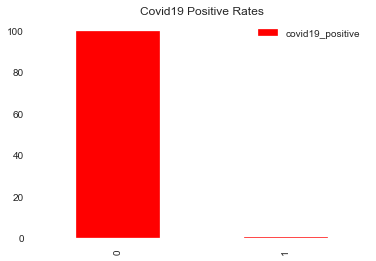

In [130]:
print(df['covid19_positive'].value_counts(normalize=True))
coviddf= pd.DataFrame(df['covid19_positive'].value_counts(normalize=True)*100)
coviddf.plot(kind='bar', color='r')
plt.title('Covid19 Positive Rates')


### Inspecting training set  for imbalance 

In [131]:
y_train.value_counts()

0    430814
1       593
Name: covid19_positive, dtype: int64

In [132]:
y_test.value_counts()

0    143605
1       198
Name: covid19_positive, dtype: int64

## Modeling:  

First Attempt: **Using 'vanilla' Decision Tree and SMOTE to address imbalances**

Subsequentially, various attempts were used to predict whether an individual would test positive for COVID-19.
    Classification models used: 
        * Decision Trees 
        * Random Forest
        * XGBoost
     
    Methods used to address the imbalance include:
        *Random Undersampling
        *Random Oversampling including SMOTE
        *Manually hyper-tuning the models
        
    GridSearch was also implemented and proved to be too computationally expensive in some cases with poor results and was abandoned.
    
  






In [133]:
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_res).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

1    430814
0    430814
dtype: int64


In [134]:
tree = DecisionTreeClassifier()
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
y_hat_test = tree.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.998,0.998,143605.000
1,0.052,0.071,0.060,198.000
accuracy,0.997,0.997,0.997,0.997
macro avg,0.525,0.534,0.529,143803.000
weighted avg,0.997,0.997,0.997,143803.000


___________________________________________


Training Accuracy :  0.9999988394063332
Test Accuracy :  0.9969402585481527
___________________________________________


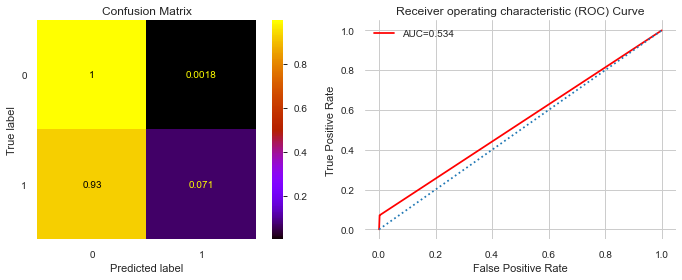

In [136]:
fn.evaluate_model(X_test, y_test, y_hat_test, X_train_res, y_train_res, tree)

In [137]:
importlib.reload(fn)

2020-05-11 05:29:21.997098-07:00
[i] Timer started at05/11/20 - 05:29 AM
[i] Timer ended at 05/11/20 - 05:29 AM
- Total time = 0:00:00


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [138]:
print(pd.Series(y_train_res).value_counts()) 

1    430814
0    430814
dtype: int64


In [139]:
y_test.value_counts()

0    143605
1       198
Name: covid19_positive, dtype: int64

Looking at factors:

In [140]:
fn.df_import(tree, X_train)

,factor,importance
0,covid19_symptoms,0.327107
1,opinion_infection,0.301737
2,oiwasnull,0.0684017
3,rate_reducing_risk_single,0.0384791
4,covid19_contact,0.0295779
5,smoking_never,0.0277361
6,smoking_quit0,0.021535
7,text_working_stopped,0.0190545
8,text_working_never,0.016272
9,diabetes,0.0148082


#### Observations for first vanilla DecisionTree Classifier using SMOTE:

> This model out of the box trained very poorly.  It is obviously overtrained and the recall and precision for true positives leave much to be desired with a recall of ~.07

Recording top factors: 


1. covid19_symptoms	0.327107
2.	opinion_infection	0.301703
-	oiwasnull	0.039126
-	rate_reducing_risk_single	0.038522
-	covid19_contact	0.029836
-	omwasnull	0.029283
-	smoking_never	0.026795
-	smoking_quit0	0.021534
-	text_working_stopped	0.019059
-	text_working_never	0.016270
-	diabetes	0.014808
-	blood_type_abp	0.011600
-	text_working_travel critical	0.010846
-	rate_reducing_risk_house	0.010533
-	blood_type_unknown	0.008998
-	country_US	0.008763
-	country_GB	0.007063
-	rate_government_action	0.007048
-	text_working_home	0.006663
	blood_type_bp	0.005332

​


#### using UnderSampling

In [143]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=123)

In [144]:
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)


In [145]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=123)
clf.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [146]:
y_hat_test1 = clf.predict(X_test)


,precision,recall,f1-score,support
0,1.000,0.725,0.841,143605.000
1,0.004,0.773,0.008,198.000
accuracy,0.725,0.725,0.725,0.725
macro avg,0.502,0.749,0.424,143803.000
weighted avg,0.998,0.725,0.839,143803.000


___________________________________________


Training Accuracy :  1.0
Test Accuracy :  0.7253812507388581
___________________________________________


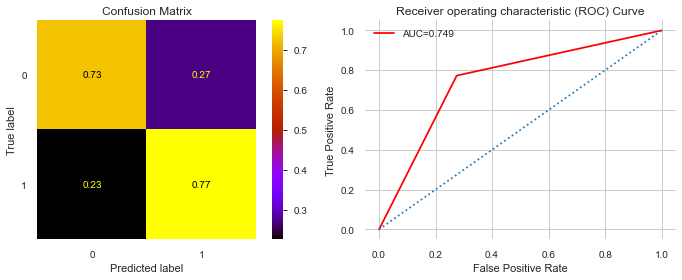

In [147]:
fn.evaluate_model(X_test, y_test, y_hat_test1, X_train_rus, y_train_rus, clf)

In [148]:
importlib.reload(fn)

2020-05-11 05:29:41.341869-07:00
[i] Timer started at05/11/20 - 05:29 AM
[i] Timer ended at 05/11/20 - 05:29 AM
- Total time = 0:00:00


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [149]:
# df_import_clf = pd.Series(clf.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_clf.sort_values().plot(kind='barh', figsize=(15,12))

In [150]:
fn.df_import(clf, X_train)

,factor,importance
0,opinion_infection,0.273447
1,covid19_symptoms,0.159422
2,bmi,0.0456143
3,alcohol,0.0432441
4,contacts_count,0.0416336
5,weight,0.0353858
6,height,0.0327729
7,oiwasnull,0.0276148
8,opinion_mortality,0.0245959
9,age,0.0236773


#### Observations:
> This model was overfit with 100% accuracy on training data and 73% on testing data.  Two sampling methods were attemped - Random Underdampling RUS) and SMOTE.  The best sampling method in terms of performance appears to be SMOTE despite improved recall scores using RUS.   

**Recording top factors:**
1.	opinion_infection	0.273447
2.	covid19_symptoms	0.159422
3.	bmi	0.045614
4.	alcohol	0.043244
5.	contacts_count	0.041634
6.	weight	0.035386
7.	height	0.032773
8.	oiwasnull	0.027615
9.	opinion_mortality	0.024596
10.	age	0.023677
11.	rate_reducing_risk_single	0.022256
12.	rate_government_action	0.019973
13.	house_count	0.019576
14.	covid19_contact	0.018271
15.	blood_type_unknown	0.013277
16.	amphetamines	0.012973
17.	rate_reducing_mask	0.012251
18.	hypertension	0.010017
19.	sex_male	0.00991
20.	text_working_never	0.008869
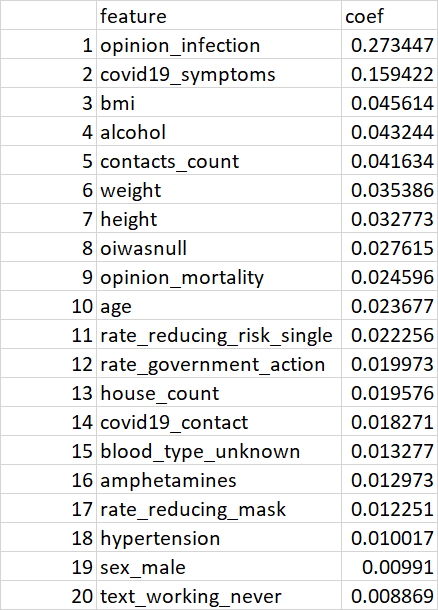

#### Manually hypertuning random undersampling:

In [151]:
clf_rus1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=.2,class_weight='balanced',random_state=123)
clf_rus1.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=0.2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=123, splitter='best')

In [152]:
yhrus = clf_rus1.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.949,0.974,143605.000
1,0.015,0.551,0.029,198.000
accuracy,0.949,0.949,0.949,0.949
macro avg,0.507,0.750,0.501,143803.000
weighted avg,0.998,0.949,0.972,143803.000


___________________________________________


Training Accuracy :  0.7462057335581788
Test Accuracy :  0.9487284688080221
___________________________________________


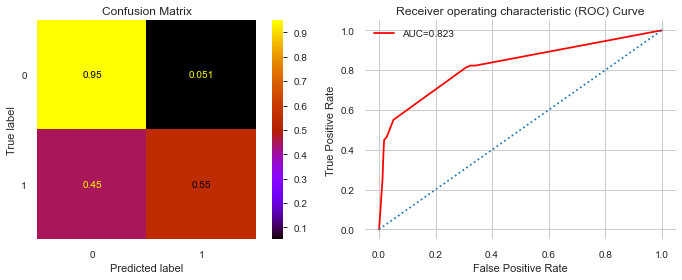

In [153]:
fn.evaluate_model(X_test, y_test, yhrus, X_train_rus, y_train_rus, clf_rus1)

In [154]:
fn.df_import(clf_rus1, X_train)

,factor,importance
0,opinion_infection,0.478567
1,covid19_symptoms,0.213205
2,covid19_contact,0.167814
3,rate_reducing_risk_single,0.029181
4,sex_female,0.0228217
5,text_working_travel non critical,0.0189586
6,weight,0.0175211
7,bmi,0.0169592
8,amphetamines,0.0136753
9,other_chronic,0.0115824


#### Observations:
Lowest training accuracy, and testing accuacy is higer than testing.  This is the widest observed split between training and testing yet and poor overall performance.  Question: Might this be to using random undersampling in addition to setting the class_weights to 'balanced'?

Top Features: 
0	opinion_infection	0.478567
1	covid19_symptoms	0.213205
2	covid19_contact	0.167814
3	rate_reducing_risk_single	0.029181
4	sex_female	0.022821

### Using GridSearchCV to optimize the DecisionTree

In [155]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold( random_state=123)

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [156]:
from sklearn.model_selection import GridSearchCV


dt_clf1 = DecisionTreeClassifier(class_weight='balanced', random_state=123)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[4,5,7,10],
             'max_features':[60, 70, 80, 85, 90,100]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(dt_clf1, param_grid, cv=skf)

In [157]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_res, y_train_res)
time.stop()

[i] Timer started at05/11/20 - 05:29 AM
[i] Timer ended at 05/11/20 - 06:13 AM
- Total time = 0:43:54.508147


In [158]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

The best parameters via GridSearchCV: {'criterion': 'gini', 'max_depth': 10, 'max_features': 100}


In [159]:
cv_dt = grid_clf.best_estimator_
cv_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [160]:
yhat2 = grid_clf.predict(X_test)

#### Applying best parameters from GridSearch 

,precision,recall,f1-score,support
0,0.999,0.990,0.995,143605.000
1,0.041,0.308,0.073,198.000
accuracy,0.989,0.989,0.989,0.989
macro avg,0.520,0.649,0.534,143803.000
weighted avg,0.998,0.989,0.993,143803.000


___________________________________________


Training Accuracy :  0.9717209747129852
Test Accuracy :  0.9891935495087029
___________________________________________


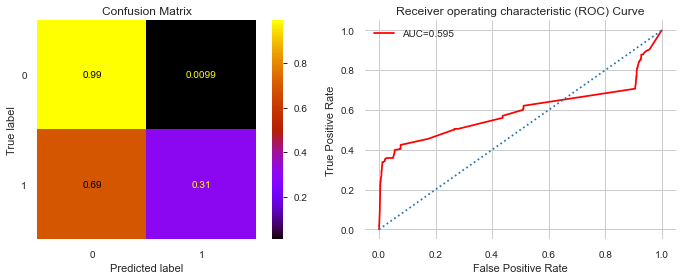

In [161]:
fn.evaluate_model(X_test,y_test, yhat2, X_train_res, y_train_res, grid_clf)

In [162]:
#fn.df_import(grid_clf,X_train)
#cannot attain feature_importances_ from a grid-search model.

In [163]:
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=75, random_state=123)
clf3.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=75, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [164]:
yh = clf3.predict(X_test)

In [165]:
clf3.score(X_test, y_test)

0.9884077522722057

In [166]:
clf3.score(X_train_res, y_train_res)

0.9787704206455686

In [167]:
fn.evaluate_model(X_test, y_test, yh, X_train_res, X_train_res, clf3)

,precision,recall,f1-score,support
0,0.999,0.989,0.994,143605.000
1,0.031,0.247,0.056,198.000
accuracy,0.988,0.988,0.988,0.988
macro avg,0.515,0.618,0.525,143803.000
weighted avg,0.998,0.988,0.993,143803.000


___________________________________________




ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

#### Observations from GridsearchCV tuned Decision Tree: 

This model has no better recall, very poor true positive rate and AUC is 2nd lowest yet. What's more the metrics are unable to handle a mix of continuous-multioutput and bianary targets (mixed variables dont' model well)

### Manually tuning Decision Tree:

In [168]:
clf4 = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=4, max_features=.15, random_state=123)
clf4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=0.15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [169]:
yh = clf4.predict(X_test)

In [170]:
import numpy as np
mean_clf4_cv_score = np.mean(cross_val_score(clf4, X_train, y_train, cv=3))


In [171]:
print(f'Mean Cross Validation score for manually tuned decision tree: {round(mean_clf4_cv_score, 4)}')

Mean Cross Validation score for manually tuned decision tree: 0.8881


,precision,recall,f1-score,support
0,0.999,0.819,0.900,143605.000
1,0.004,0.475,0.007,198.000
accuracy,0.819,0.819,0.819,0.819
macro avg,0.501,0.647,0.454,143803.000
weighted avg,0.998,0.819,0.899,143803.000


___________________________________________


Training Accuracy :  0.6440308346525415
Test Accuracy :  0.8187033650202012
___________________________________________


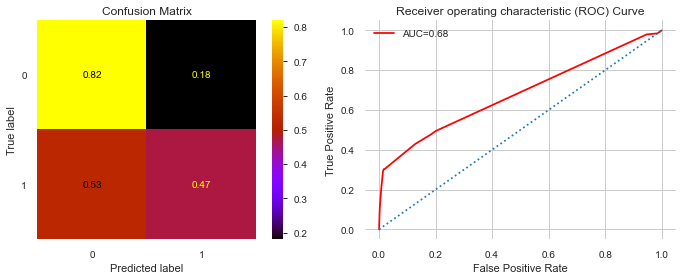

In [172]:
fn.evaluate_model(X_test, y_test, yh, X_train_res, y_train_res, clf4)

In [173]:
fn.df_import(clf4, X_train)

,factor,importance
0,covid19_contact,0.683219
1,rate_reducing_risk_single,0.107653
2,covid19_symptoms,0.0900334
3,opinion_infection,0.0271141
4,height,0.0257895
5,smoking_vape,0.0241002
6,text_working_travel critical,0.0134041
7,heart_disease,0.0125199
8,cocaine,0.0114362
9,contacts_count,0.00195167


#### Obervations on manually-tuned Decision Tree:

After adjusting parameters by penalizing the depth and tuning max_features, the optimal outcome was achieved here:

>DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=0.15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')



While recall improved on true positives (47%), AUC leaves some to be desired 68% and mean cross-validation score is .8881. Testing data score is consistently higher than training scores which has to do with highly imbalanced data.

Top factors include: 
1. covid-19 contact
2. single behavior modifications 
3. symptoms  
4. opinion infection

#### Trying GridSearch on Decision Tree Classifier using Undersampled classes

In [174]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_rus, y_train_rus)
time.stop()

[i] Timer started at05/11/20 - 08:34 AM
[i] Timer ended at 05/11/20 - 08:34 AM
- Total time = 0:00:01.548422


In [175]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

The best parameters via GridSearchCV: {'criterion': 'gini', 'max_depth': 5, 'max_features': 90}


In [176]:
clf5 = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=5, max_features=90, random_state=123)
clf5.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=90, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [177]:
yh5 = clf5.predict(X_test)

In [178]:
mean_clf5_cv_score = np.mean(cross_val_score(clf5, X_train_rus, y_train_rus, cv=3))

In [179]:
print(f'Mean Cross Validation Score for Decision Tree using Grid Search on Undersampled data {round(mean_clf5_cv_score,4)}')

Mean Cross Validation Score for Decision Tree using Grid Search on Undersampled data 0.7614


,precision,recall,f1-score,support
0,1.000,0.961,0.980,143605.00
1,0.022,0.652,0.043,198.00
accuracy,0.960,0.960,0.960,0.96
macro avg,0.511,0.806,0.511,143803.00
weighted avg,0.998,0.960,0.978,143803.00


___________________________________________


Training Accuracy :  0.8136593591905565
Test Accuracy :  0.9601190517583083
___________________________________________


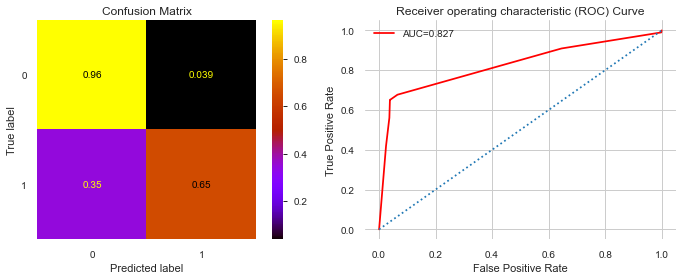

In [180]:
fn.evaluate_model(X_test, y_test, yh5, X_train_rus, y_train_rus, clf5)

In [181]:
fn.df_import(clf5, X_train)

,factor,importance
0,opinion_infection,0.519363
1,covid19_symptoms,0.31903
2,rate_reducing_risk_single,0.0457375
3,covid19_contact,0.0404451
4,contacts_count,0.0327985
5,cocaine,0.0121582
6,smoking_yesmedium,0.0121074
7,blood_type_abn,0.00690185
8,bmi,0.00463551
9,rate_reducing_risk_house,0.00422912


#### Observations: 
This model is somewhat improved with a cross-validation score of .76. The true positive rates have improved to 65%, as well as the AUC with a result of .827.  The testing accuracy 96% is higher than the training accuracy 81% still indicating that the test data isn't from the same sample as the training data and is more than likely attributed to a hyper-skewed class assignement.  


> Top Features: 
1. opinion_infection	0.519363
-	covid19_symptoms	0.319030
-	rate_reducing_risk_single	0.045737
-	covid19_contact	0.040445
-	contacts_count	0.032799


### Gridsearch on Random Forest using Undersampling:

In [182]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=123)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[7,8, 10,15],
             'max_features':[70, 80, 85, 90,100],
             'n_estimators' :[75,100,125, 150]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(rf_clf, param_grid, cv=skf)

In [183]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_rus, y_train_rus)
time.stop()

[i] Timer started at05/11/20 - 08:35 AM
[i] Timer ended at 05/11/20 - 08:39 AM
- Total time = 0:04:32.680020


In [184]:
mean_rf_cv_score = np.mean(cross_val_score(grid_clf, X_train_rus, y_train_rus, cv=3))
mean_rf_cv_score

0.7968098708605037

In [185]:
print(f" Best parameters found via GridSearchCV:{grid_clf.best_params_}")

 Best parameters found via GridSearchCV:{'criterion': 'gini', 'max_depth': 10, 'max_features': 70, 'n_estimators': 100}


In [186]:
print(f" Best estimators found via GridSearchCV: {grid_clf.best_estimator_}")

 Best estimators found via GridSearchCV: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=70,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


#### Applying best parameters found via GriSearchCV

In [187]:
timer = fn.Timer()
timer.start()
rfgs_clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features=70, n_estimators=100, random_state=123)

rfgs_clf.fit(X_train_res, y_train_res)
timer.stop()
mean_rf_cv_score = np.mean(cross_val_score(rfgs_clf, X_train_rus, y_train_rus, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

[i] Timer started at05/11/20 - 08:50 AM
[i] Timer ended at 05/11/20 - 09:08 AM
- Total time = 0:18:06.564980
Mean Cross Validation Score for Random Forest Classifier: 79.76%


In [188]:
y_hat_test2 = rfgs_clf.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.995,0.997,143605.000
1,0.065,0.263,0.104,198.000
accuracy,0.994,0.994,0.994,0.994
macro avg,0.532,0.629,0.550,143803.000
weighted avg,0.998,0.994,0.996,143803.000


___________________________________________


Training Accuracy :  0.7554806070826307
Test Accuracy :  0.9937692537707836
___________________________________________


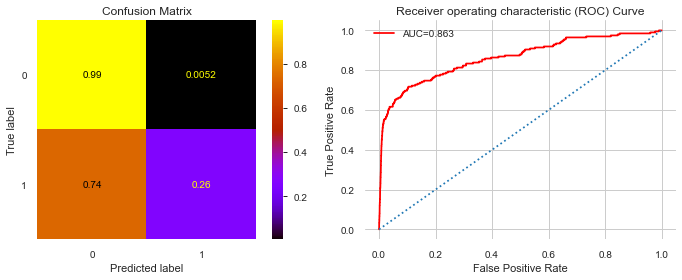

In [189]:
fn.evaluate_model(X_test, y_test, y_hat_test2, X_train_rus, y_train_rus, rfgs_clf)

In [190]:
    df_import = pd.DataFrame(rfgs_clf.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

,feature,coef
16,covid19_symptoms,0.230841
27,opinion_infection,0.209132
17,covid19_contact,0.121898
14,rate_reducing_risk_house,0.067957
31,taking_prescription_medication,0.051272
13,rate_reducing_risk_single,0.038375
217,smoking_never,0.038012
15,rate_reducing_mask,0.032829
228,text_working_travel critical,0.027977
227,text_working_stopped,0.020079


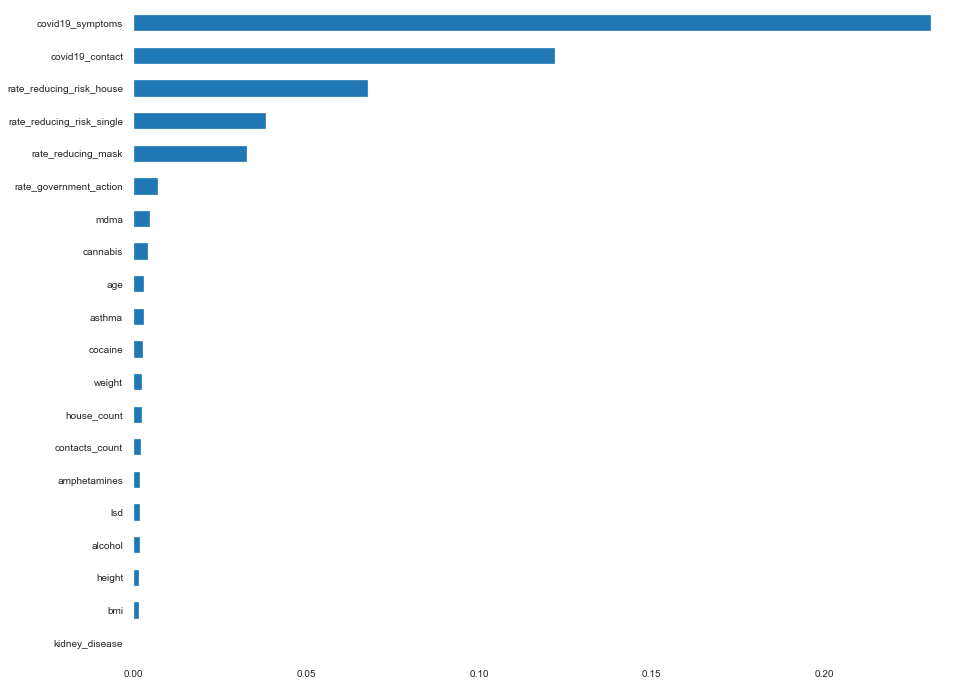

In [191]:
df_import_clfgs = pd.Series(rfgs_clf.feature_importances_, index=X_train.columns, name='importance').head(20)
df_import_clfgs.sort_values().plot(kind='barh', figsize=(15,12))

#### Observations using GridSearch Random Forest Classifier on Random UnderSampled Data

> Still having trouble with precision and classifying true positives with a hyper lack-luster result of 26% - worst  yet, and training accuracy of 77.5% , testing accuracy of 99.3%, Interesting that AUC of 86% and high avg accuracy scores.
Mean Cross Validation Score for Random Forest Classifier: 79.76% 


**Top factors remain:**
1. Covid19 Symptoms
2. Opinion Infection
3. Covid19 Contact
4. rate_reducing_house
5. rate_reducing_single


### GridSearchCV to optimize RandomForrest on SMOTED data:

In [192]:
# time = fn.Timer()
# time.start()
# rf_clf1 = RandomForestClassifier(random_state=111)
# ## Set up param grid
# param_grid = {'criterion':['gini','entropy'],
#              'max_depth':[2,3,4,5],
#              'max_features':[.2, .3, .4],
#              'n_estimators' :[90,95,100,105]}

# ## Instantiate GridSearchCV
# grid_clff = GridSearchCV(rf_clf1, param_grid, cv=skf,verbose=1, n_jobs=-1)
# time.stop()
# #fit grid
# grid_clff.fit(X_train_res, y_train_res)

# best_parameters = grid_clff.best_params_
# print(f'GridSearch found the following optimal parameters:')
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))#

In [193]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.ensemble import RandomForestClassifier
# time = fn.Timer()
# time.start()
# rf_clf1 = RandomForestClassifier(class_weight='balanced', random_state=111)
# ## Set up param grid
# param_grid = {'criterion':['gini','entropy'],
#              'max_depth':[2,3,4,5],
#              'max_features':[.2, .3, .4],
#              'n_estimators' :[90,95,100,105]}

# ## Instantiate GridSearchCV
# grid_clff = GridSearchCV(rf_clf1, param_grid, cv=skf,verbose=1, n_jobs=-1)
# time.stop()

In [194]:
#grid_clff.

#### Observation: 
GridSearch was too computationally expensive on SMOTED data

### XGBoost

In [195]:
## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier
## Fit and Evaluate

xgb_rf = XGBRFClassifier(class_weight='balanced',random_state=123)





In [196]:
time = fn.Timer()
time.start()
xgb_rf.fit(X_train,y_train)
time.stop()


[i] Timer started at05/11/20 - 09:09 AM
[i] Timer ended at 05/11/20 - 09:11 AM
- Total time = 0:02:35.686340


In [197]:
# y_train_data = np.array(y_train)
# X_train_data = np.array(X_train)
# y_test_data = np.array(y_test)
# X_test_data = np.array(X_test)

In [198]:
print(xgb_rf.score(X_train,y_train))
print(xgb_rf.score(X_test,y_test))

0.9986254279601398
0.9986231163466687


In [199]:
y_hat_test = xgb_rf.predict(X_test)

In [200]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, _ = precision_recall_curve(y_test, y_hat_test)
auc_score = auc(recall, precision)
print(f'Precision Recall AUC: {auc_score}')

Precision Recall AUC: 0.5006884418266656


C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.999,1.000,0.999,143605.000
1,0.000,0.000,0.000,198.000
accuracy,0.999,0.999,0.999,0.999
macro avg,0.499,0.500,0.500,143803.000
weighted avg,0.997,0.999,0.998,143803.000


___________________________________________


Training Accuracy :  0.9986254279601398
Test Accuracy :  0.9986231163466687
___________________________________________


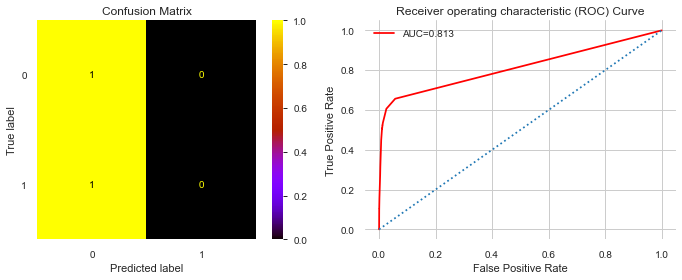

In [201]:
fn.evaluate_model(X_test, y_test, y_hat_test, X_train, y_train, xgb_rf)

### Observations: Testing rate is still higher than training data, true positive rate is 59%. Will resume with random forest model since so far has been the most promising thus far.

### GridSearch was too computationally expensive on SMOTED data using Random Forest Classification. 

Will tune Random Forest Manually:


In [202]:
time = fn.Timer()
time.start()
rf_clf2 = RandomForestClassifier(criterion='gini', max_depth=5, max_features=.3, n_estimators=100, class_weight='balanced', random_state=111)
rf_clf2.fit(X_train_res, y_train_res)
time.stop()

[i] Timer started at05/11/20 - 09:12 AM
[i] Timer ended at 05/11/20 - 09:22 AM
- Total time = 0:10:17.474195


In [203]:
yh2 = rf_clf2.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.982,0.991,143605.000
1,0.041,0.571,0.077,198.000
accuracy,0.981,0.981,0.981,0.981
macro avg,0.520,0.776,0.534,143803.000
weighted avg,0.998,0.981,0.989,143803.000


___________________________________________


Training Accuracy :  0.9408027594275024
Test Accuracy :  0.981245175691745
___________________________________________


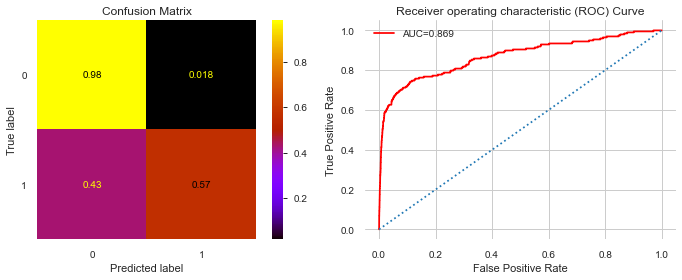

In [204]:
fn.evaluate_model(X_test, y_test, yh2, X_train_res, y_train_res, rf_clf2)

In [205]:
# time = fn.Timer()
# time.start()
# rf_clf3 = RandomForestClassifier(criterion='gini', max_depth=3, max_features=.45, n_estimators=95, class_weight='balanced', random_state=111)
# rf_clf3.fit(X_train_res, y_train_res)
# time.stop()

In [206]:
# yh4= rf_clf3.predict(X_test)


In [207]:
# fn.evaluate_model(X_test,y_test, yh4, X_train_res, y_train_res, rf_clf3)

###  Manually Tuned Random Forest using smoted data.

In [208]:
y_test.value_counts(normalize=True)

0    0.998623
1    0.001377
Name: covid19_positive, dtype: float64

In [209]:
time = fn.Timer()
time.start()
rf_clf3 = RandomForestClassifier(criterion='gini', max_depth=2, max_features=.45,n_estimators=80, random_state=111)
rf_clf3.fit(X_train_res, y_train_res)
time.stop()

[i] Timer started at05/11/20 - 09:22 AM
[i] Timer ended at 05/11/20 - 09:30 AM
- Total time = 0:07:53.703066


In [210]:
yh5=rf_clf3.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.966,0.983,143605.000
1,0.025,0.616,0.047,198.000
accuracy,0.966,0.966,0.966,0.966
macro avg,0.512,0.791,0.515,143803.000
weighted avg,0.998,0.966,0.981,143803.000


___________________________________________


Training Accuracy :  0.8925626836639478
Test Accuracy :  0.9657726194863807
___________________________________________


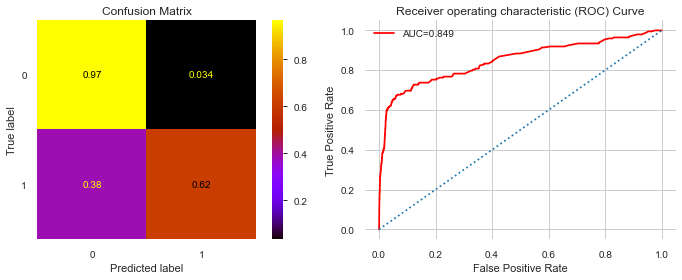

In [211]:
fn.evaluate_model(X_test, y_test, yh5, X_train_res, y_train_res, rf_clf3)

###  Observations on manually tuned random forest using smoted data.

Improved recall by .25 and slightly improve the overtrained data via several iterations of training. This model has an overall accuracy average of .97 and weighted recall of .97. Training accuracy dropped to .89, and AUC proved this model is 85% reliable.

The most important factors are listed below:


In [212]:
fn.df_import(rf_clf3,X_train,n=10)

,factor,importance
0,covid19_symptoms,0.450538
1,opinion_infection,0.217297
2,covid19_contact,0.206646
3,rate_reducing_risk_house,0.0424337
4,taking_prescription_medication,0.0260322
5,text_working_travel critical,0.0159807
6,rate_reducing_risk_single,0.0153934
7,smoking_never,0.0106096
8,rate_reducing_mask,0.0076694
9,oiwasnull,0.00319239


### Looking for correlations in relation to feature importance:

In [213]:
df_cor = pd.DataFrame(df2.corr()['covid19_positive'].sort_values(ascending=False))
df_cor

,covid19_positive
covid19_positive,1.000000
covid19_symptoms,0.088013
covid19_contact,0.050423
opinion_infection,0.049646
country_DK,0.012630
...,...
alcohol,-0.004861
smoking_yesmedium,-0.005062
rate_reducing_risk_house,-0.008963
sex_female,-0.009122


Never smoking came up as an important feature and am curious the correlation:

In [214]:
df_cor.loc['smoking_never']

covid19_positive    0.000898
Name: smoking_never, dtype: float64

In [215]:
df_cor.loc['smoking_yesmedium']

covid19_positive   -0.005062
Name: smoking_yesmedium, dtype: float64

In [216]:
df_cor.loc['smoking_yesheavy']

covid19_positive    0.000687
Name: smoking_yesheavy, dtype: float64

In [217]:
df_cor.loc['smoking_yeslight']

covid19_positive   -0.001248
Name: smoking_yeslight, dtype: float64

In [218]:
df_cor.loc['sex_male']

covid19_positive    0.009141
Name: sex_male, dtype: float64

In [219]:
df_cor.loc['sex_female']

covid19_positive   -0.009122
Name: sex_female, dtype: float64

In [220]:
df_cor.loc['bmi']

covid19_positive    0.004146
Name: bmi, dtype: float64

#### Vizualizing Trees in Forest:

In [221]:
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image  

In [222]:
rf_clf3.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=0.45, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=481767252, splitter='best')

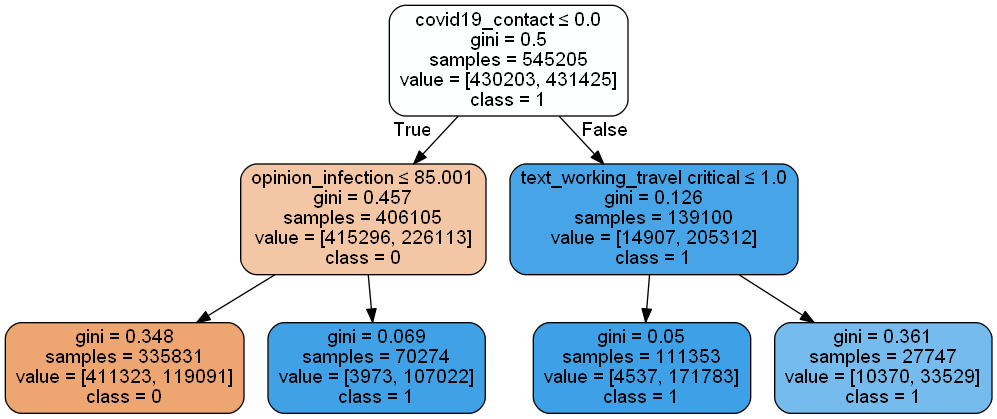

In [223]:
# Create DOT data
dot_data = export_graphviz(rf_clf3.estimators_[9], out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

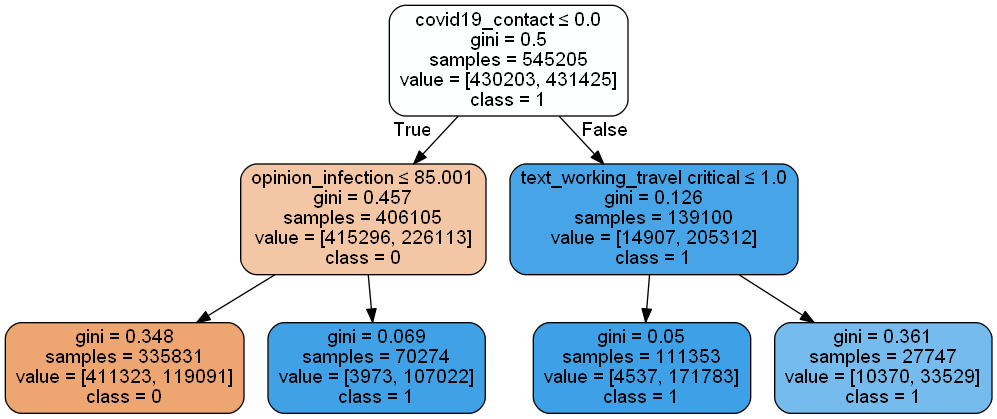

In [224]:
# Create DOT data
dot_data1 = export_graphviz(rf_clf3.estimators_[9], out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph1 = graph_from_dot_data(dot_data1)  

# Show graph
Image(graph1.create_png())

## BEST MODEL: Manually tuned Random Forest




In [225]:
time = fn.Timer()
time.start()
rf_clf8 = RandomForestClassifier(criterion='gini', max_depth=2, max_features=.45, class_weight='balanced',n_estimators=80, random_state=111)
rf_clf8.fit(X_train, y_train)
time.stop()

[i] Timer started at05/11/20 - 09:33 AM
[i] Timer ended at 05/11/20 - 09:34 AM
- Total time = 0:01:19.461404


In [226]:
yh8=rf_clf8.predict(X_test)

In [227]:
mean_rf_cv_score = np.mean(cross_val_score(rf_clf8, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 95.96%


,precision,recall,f1-score,support
0,0.999,0.958,0.978,143605.000
1,0.020,0.636,0.040,198.000
accuracy,0.958,0.958,0.958,0.958
macro avg,0.510,0.797,0.509,143803.000
weighted avg,0.998,0.958,0.977,143803.000


___________________________________________


Training Accuracy :  0.9575319825593929
Test Accuracy :  0.9575947650605342
___________________________________________


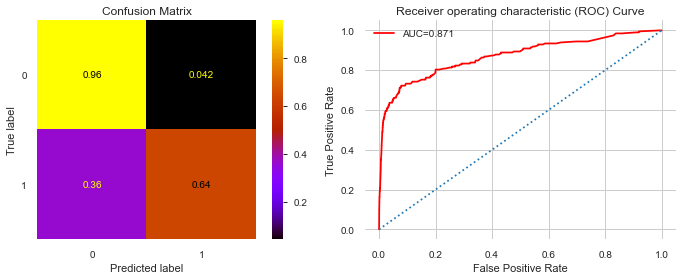

In [228]:
fn.evaluate_model(X_test, y_test, yh8, X_train, y_train, rf_clf8)

###  Observations on manually tuned random forest:

The overtraining data issues were addressed via several iterations of tuning the modeling as well as the issues associated with a hyper imbalanced minority target class.  **This model has an overall accuracy average of .96 and weighted recall of .96**  this iteration has yieled the highest true positive rate and is highest rated in terms of overall performance.  Mean Cross Validation Score revealed a result of 95.96%.

The area under the curve demonstrates the reliability of the model is 87.1% which is a 34% increase over the baseline of .53 introduced in the inital model.

The most important factors are listed below:


In [229]:
fn.df_import(rf_clf8,X_train,n=10)

,factor,importance
0,opinion_infection,0.529735
1,covid19_symptoms,0.285415
2,covid19_contact,0.122519
3,rate_reducing_risk_house,0.0136553
4,omwasnull,0.0127974
5,rate_reducing_risk_single,0.0108048
6,oiwasnull,0.00731367
7,sex_male,0.00641232
8,sex_female,0.00354491
9,bmi,0.00247806


opinion_infection           0.529735
covid19_symptoms            0.285415
covid19_contact             0.122519
rate_reducing_risk_house    0.013655
omwasnull                   0.012797
                              ...   
country_MZ                  0.000000
country_MY                  0.000000
country_MX                  0.000000
country_MW                  0.000000
country_KE                  0.000000
Name: importance, Length: 230, dtype: float64

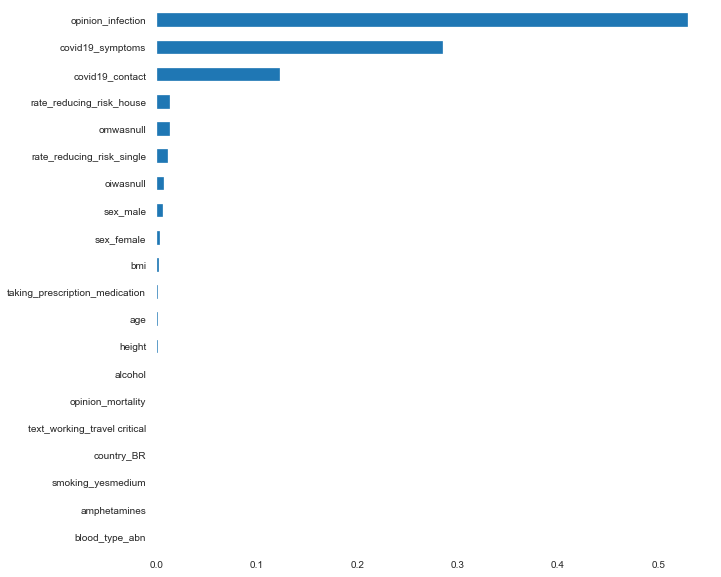

In [230]:
fn.plot_importance(rf_clf8,X_train)


#### Decision Tree visualizations from Random Forest Model:

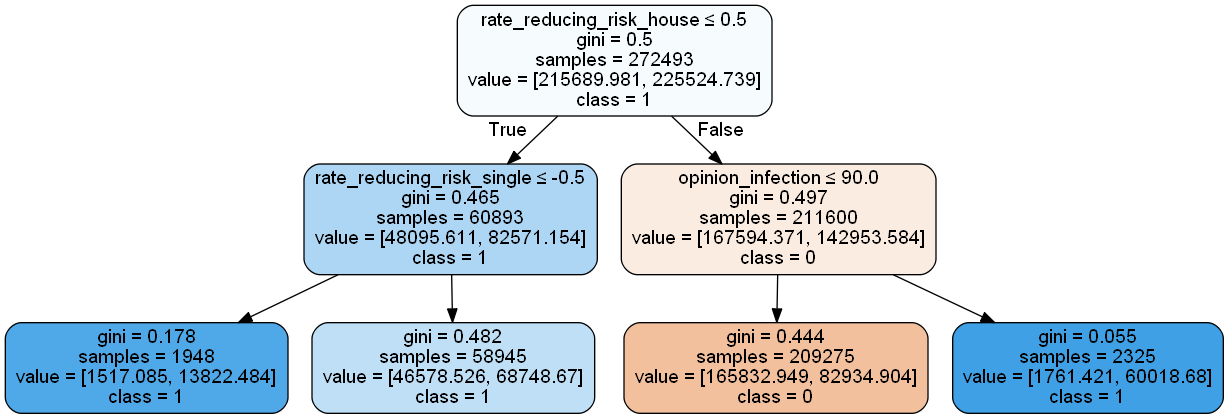

In [231]:
dot_data1 = export_graphviz(rf_clf8.estimators_[3], out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph1 = graph_from_dot_data(dot_data1)  

# Show graph
Image(graph1.create_png())

#### Attempting Randomized Search:

**WARNING: The following 7 input lines tast take 94.5 mins to run and have been commented out.** 

The model was clearly overtrained and performed poorly.  Observations are recorded below:

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
# stop
# time = fn.Timer()
# time.start()
# rf_clfb = RandomForestClassifier(class_weight='balanced', random_state=111)
# ## Set up param grid
# param_grid = {'criterion':['gini','entropy'],
#              'max_depth':[7,8, 10,15],
#              'max_features':[.2, .3, .45],
#              'n_estimators' :[75,100,125, 150]}

# ## Instantiate GridSearchCV
# rgrid_clfb = RandomizedSearchCV(rf_clfb, param_grid, n_jobs=-1, verbose=1, cv=skf)
# time.stop()

In [234]:
#rgrid_clfb.fit(X_train, y_train)

In [235]:
#yhtrgrid = rgrid_clfb.predict(X_test)

In [236]:
#rgrid_clfb.best_params_

In [237]:
# rf_clfb1 = RandomForestClassifier(criterion = 'gini', n_estimators=100, max_features=.2, 
#                                   max_depth=15, class_weight='balanced', random_state=111)
# time = fn.Timer()
# time.start()
# rf_clfb1.fit(X_train, y_train)
# time.stop()

In [238]:
# hytb1 = rf_clfb1.predict(X_test)

In [239]:
#fn.evaluate_model(X_test, y_test, hytb1, X_train_res, y_train_res, rf_clfb1)

#### Observations:
Validates that a manually tuned Random Forest model performed best.  Depite the AUC remaining relatively high(86.1), the true positive rate is extremely poor at .12.

precision | recall |	f1-score |	support
--| --| --| --|
0	|**0.999**	|0.998|	0.999|	143605.000
1	|0.085|	**0.116**	|0.098|	198.000
accuracy	|0.997	|0.997|	0.997	|0.997
macro avg|	0.542|	0.557	|0.548	|143803.000
weighted avg|	0.998|0.997|	0.997	|143803.000
___________________________________________


Training Accuracy :  0.9988614576127981
Test Accuracy :  0.9970584758315195
____________________________________

## Conclusion:

This dataset was a random sample of over 618,000 individuals reporting biological, behavioral, and environmental factors as well as their COVID-19 status.  The medium used to collect the data is operated by a UK - based an open-source platform that's main focus is data analytics and is non-medical in nature.  The questionaire used to collect data has undergone several versions and several features collected during this sample are no longer being tracked.  A very small rate (.13%) reported testing positive providing a hyper-imbalanced dataset.  It should be noted that at this time there was a shortage of tests available in the United States as well as time taken to get results was up to two weeks in latency.

Using data collected over a 15 day span (March 27 - April 10, 2020), a predictive model was developed to identify top factors in contracting COVID-19.

The factors that rated highest in predicting contraction of COVID-19 were derived using a Random Forest Classification model that yeilded an overall accuracy average of .97 and weighted recall of .97.  A Receiver Operator Characteristic (ROC) curve demonstrates a diagnostic ability of this binary classifier to be 84.9%.  This model ran at a higher sensitivy rate of 96% than it's specificity rate of 64%. 

The most important factors are listed below.  The + or - signs indicate whether the correlations associated with these factors were positive or negative:

Factor| Description |	Importance | Correlation
--| --| --| --|
opinion_infection| Individual believed they contracted COVID-19| 	0.529735 | +
covid19_symptoms| Individual exhibited COVID-19 symptops| 	0.285415 | +
covid19_contact | Individual came in contact with another who was COVID-19+ |	0.122519 | +
rate_reducing_risk_house | Househould practiced social distancing and hygiene |	0.0136553 | -
omwasnull | Individual did not respond if they believed they could die from COVID-19| 0.0127974 | +
rate_reducing_risk_single |Individual practiced social distancing and hygiene |	0.0108048 | -
oiwasnull | Individual did not respond if they believed they could die from COVID-19|0.00731367|+
sex_male | Indivdiual was male |	0.00641232 | +
sex_female | Individual was female |	0.00354491 | -
bmi | Body Mass Index (kg/m** 2)|	0.00247806 | +
taking prescription medication | The individual was taking prescription medication | 0.001504 | +





It's common sense that having symptoms and coming into contact with someone infected would be factors in contracting a contagious disease, and are proven as such since they classified as top factors. More information is needed on  'opinion_infection' as this is also a top factor.  It is believed that this feature indicates the individual is infected with COVID-19. However there is no background and data is no longer being collected on this datapoint. 

The fields 'oiwasnull' and 'omwasnull' is associated with this factor - and reflects that respondents did not fill this value in.  Possible suggested reasons for this are 1) lack of attention to detail by the respondant, 2) stigma or other psychological rationale associated with being COVID-19+ 3) Survey stopped collecting data.  

This model also illustrates that behavioral modifications such as taking precautionary measures by practicing social distancing and hygiene individually and as a household as important factors in predicting disease contraction.  It should be noted that collective action ranked higher than individual action and the more these behaviors increased, classifing the individual as COVID-19+ decreased.  In addition, these two factors were the two most negatively correlated factors with testing positive.

Sex ranked in the top 10 as important factors as well. Men ranked higher than women and this is accentuated by the fact that men had a positive correlation with becoming infected and women had a negative correlation.   

Both BMI and taking prescriptions even relatively small in comparison were identified in terms of feature importance.  
There are many possible reasons why increased BMI could be associated with an increased succeptibility.  [This study](https://watermark.silverchair.com/ciaa415.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAoQwggKABgkqhkiG9w0BBwagggJxMIICbQIBADCCAmYGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMVXV_JGiK8L-3DL_MAgEQgIICN77iaVCmYvPz7CwP7dpJRua4RrrP384UJAH-QXvKyiAQrwDWcADuTGgZMbhF_qxtAG8LP6XC4F70O1TyJx6B5w896GRNhvMIRaKWdWNm3JeCVlzXVX9LLVgAshV2CIL8UZSmLmUwBIMU0v8_8tKA_QloitlBiu_TvBmea4YaA99nNj-IrQjleAwriZjRHKIeaI3EFJuXYMuaBuOFGBMReNvDq1gfYxwmrbC4aX0W7sYRHPE7YFsfb4AZDMsVdx8-2t7Sn9VSmK0jP-dq46OmhC8Ed_MfuyAhRaqTGClD5OAyNSuZYF_ErgEf0OEX5dcXyMBJLnPlVi71thCX_MjcQBmhvJdymnIYXRc_PJUSj1N0V1uKZe4YBTfU00sN2Uke-UCqHo_34C7axYyYoW2wfcw3fLb-VtWMITOSM4oZkPu7oGX5Mq5IH0jr4d3oUKQD5Ar_lD6yG2p5F7c-yczARNpL109KjfBEd760prsGbft8Cd9GGKkGuR8bnpY0q1QMKuVHE1BCXqrwRa2Ypjx8oKL0Cor3ZyPPBGJbDBUBe9oMf8BbFwRqUa02fIQ66gt7-lHzvPZ2_1aLmQBvCmWmWq8OEkkkaem0_kVLDobAXTfhMwV-Ho7AT_5V9S1UOY0TCjn-I0_FvKKrEqi9qMBz_gJhUabfjd6Ph9YZpCiQO2z9YpyufH-OE-4Un7CSSLAsyHnpir5V55iJjiDsv0HA1ULdYcnE2Pkkj8EWjaUrAsqTbq0Lwb2z-g) supports those who have a bmi greater than 35 are at higher risk.  Future work could be done to further investigate the BMI feature interpret if this dataset aligns with this model.

Those taking prescription medications could suggest a state poor health, but claiming this rationale is somewhat presumptive and would obviously need further investigation.  The data provided did include quantities and labels for each prescription medication, however since the nature of 57000 unique values in the original dataset, it was tracked to evaluate feature importance.  Future work could be done in this area while taking into consideration the ranking of it's relatively low feature importance. 

## Recommendations: 
>1. If an individual has symptoms associated with COVID-19, or think they could be infected, testing is recommended for confirmation.
2. Practice social distancing and hygiene individually and as a household
        *This is especially true for males and those with high BMI.
3. Avoid contact with those known to be infected.
4.  If taking prescription medication, it is recommended to discuss additional risk for infection with a physician.

    
 



## Appendix: 

This section contains code for some of the visualizations and supporting information used in the non-technial presentation.

In [240]:
importlib.reload(fn)

2020-05-11 09:37:35.514002-07:00
[i] Timer started at05/11/20 - 09:37 AM
[i] Timer ended at 05/11/20 - 09:37 AM
- Total time = 0:00:00.000997


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [241]:
#getting all necessary feature imporance values from best model
corrs = pd.Series(rf_clf8.feature_importances_, index=X_train.columns, name='importance')
x = corrs.sort_values(ascending=False).head(11)
x

opinion_infection                 0.529735
covid19_symptoms                  0.285415
covid19_contact                   0.122519
rate_reducing_risk_house          0.013655
omwasnull                         0.012797
rate_reducing_risk_single         0.010805
oiwasnull                         0.007314
sex_male                          0.006412
sex_female                        0.003545
bmi                               0.002478
taking_prescription_medication    0.001504
Name: importance, dtype: float64

In [242]:
#df with all features and corresponding correlation values
df_cor = pd.DataFrame(df2.corr()['covid19_positive'].sort_values(ascending=False))
df_cor

,covid19_positive
covid19_positive,1.000000
covid19_symptoms,0.088013
covid19_contact,0.050423
opinion_infection,0.049646
country_DK,0.012630
...,...
alcohol,-0.004861
smoking_yesmedium,-0.005062
rate_reducing_risk_house,-0.008963
sex_female,-0.009122


In [243]:
#pulling all correlations for each of the important features for best model:
y = df_cor.loc[list(x.index),:]
y

,covid19_positive
opinion_infection,0.049646
covid19_symptoms,0.088013
covid19_contact,0.050423
rate_reducing_risk_house,-0.008963
omwasnull,0.002919
rate_reducing_risk_single,-0.012114
oiwasnull,0.002919
sex_male,0.009141
sex_female,-0.009122
bmi,0.004146


### Vizualizations for non-technical presentation:

Text(0.5, 1.0, 'Random Forest Classifier Prediction Rates')

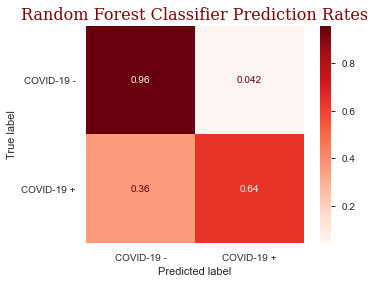

In [244]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


labels = ['COVID-19 -','COVID-19 +']

cnf_matrix = metrics.plot_confusion_matrix(rf_clf8,X_test,y_test,cmap='Reds',
                              normalize='true',display_labels=labels)
plt.title('Random Forest Classifier Prediction Rates', fontdict=font)



In [245]:
pos_map = {'0' : 'Covid19 Negative',
          '1': 'Covid19 Posistive'}

coviddf['covid19_positive'] = coviddf['covid19_positive'].map(pos_map)

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64


Text(0, 0.5, 'Percent')

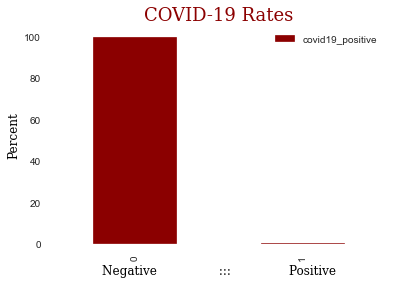

In [246]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
print(df['covid19_positive'].value_counts(normalize=True))
lables = ['Negative', 'Positive']
coviddf= pd.DataFrame(df['covid19_positive'].value_counts(normalize=True)*100)
coviddf.plot(kind='bar', color='darkred')
plt.title('COVID-19 Rates', fontdict=font)
plt.xlabel('Negative                :::               Positive', fontdict=font1)

plt.ylabel('Percent', fontdict=font1)




Text(0.5, 1.0, 'Top 10 Feature Importance for the Contraction of COVID-19')

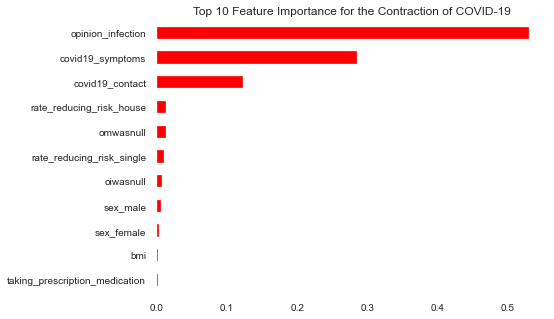

In [247]:
fig= plt.figure()
df_import = pd.Series(rf_clf8.feature_importances_, index=X_train.columns, name='importance')
df_import.sort_values().tail(11).plot(kind='barh',color='red', figsize=(7,5))
plt.title('Top 10 Feature Importance for the Contraction of COVID-19')





In [248]:
import shap

In [249]:
shap.initjs()

In [273]:
explainer = shap.TreeExplainer(rf_clf8.estimators_[45])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [274]:
shap_values = explainer.shap_values(X_train, y_train)

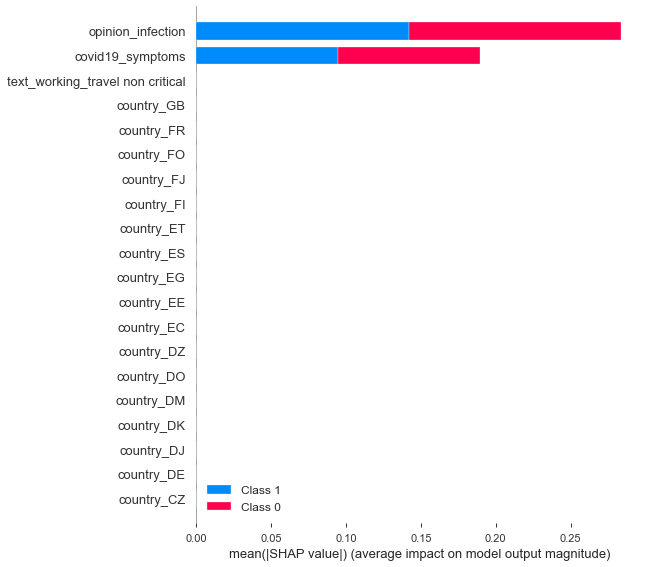

In [275]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

In [253]:
df2['covid19_positive'].value_counts(normalize=True)

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64

In [254]:
#!pip install Counter
from collections import Counter
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
data = {"x":[], "y":[], "label":[]}
for label, coord in counter.items():
    data["x"].append(coord[0])
    data["y"].append(coord[1])
    label["label"].append(label)
    
plt.figure(figsize=(10,8))
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(data["x"], data["y"], marker = 'o')

# add labels
for label, x, y in zip(data["label"], data["x"], data["y"]):
    plt.annotate(label, xy = (x, y))

Counter({'covid19_positive': 1})


TypeError: 'int' object is not subscriptable

In [ ]:
counter.items()

In [ ]:
# featimpt = ['covid19_symptoms','opinion_infection', 'covid19_contact','rate_reducing_risk_house',
# 'taking_prescription_medication','text_working_travel critical','rate_reducing_risk_single',
# 'smoking_never', 'rate_reducing_mask', 'oiwasnull']featimpt

In [ ]:
importlib.reload(fn)

In [ ]:
df_cor.loc['smoking':]

In [ ]:
df_cor.head(60)

In [ ]:
df_cor.tail(50)

In [ ]:
def _plot_classification_report(y_true, y_pred_class):
    import sklearn.metrics as metrics
    report = metrics.classification_report(y_true, y_pred_class, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(4)

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=report_df.values,
             colLabels=report_df.columns,
             rowLabels=report_df.index,
             loc='center',
             bbox=[0.2, 0.2, 0.8, 0.8])
    fig.tight_layout()

    return fig 

In [ ]:
#alternative code for feature importance:
#df_import_tree = pd.Series(tree.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_tree.sort_values().plot(kind='barh', figsize=(15,12))

In [ ]:
!pip install mictools

In [ ]:
!pip install ppscore